##  3. VISUALIZATION AND FEATURE SELECTION

In [1]:
# Import the libraries we will need
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import math

# setting the visual
sns.set(font_scale=2)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline    

In [2]:
df = pd.read_csv('./input/dc_crime2.csv')
ward_data =pd.read_csv('./input/warddata.csv')

#####  3.1. VISUALIZATION and Feature  Engineeting|Selection

##### crimes by type per shift

---< offenses categorized>----


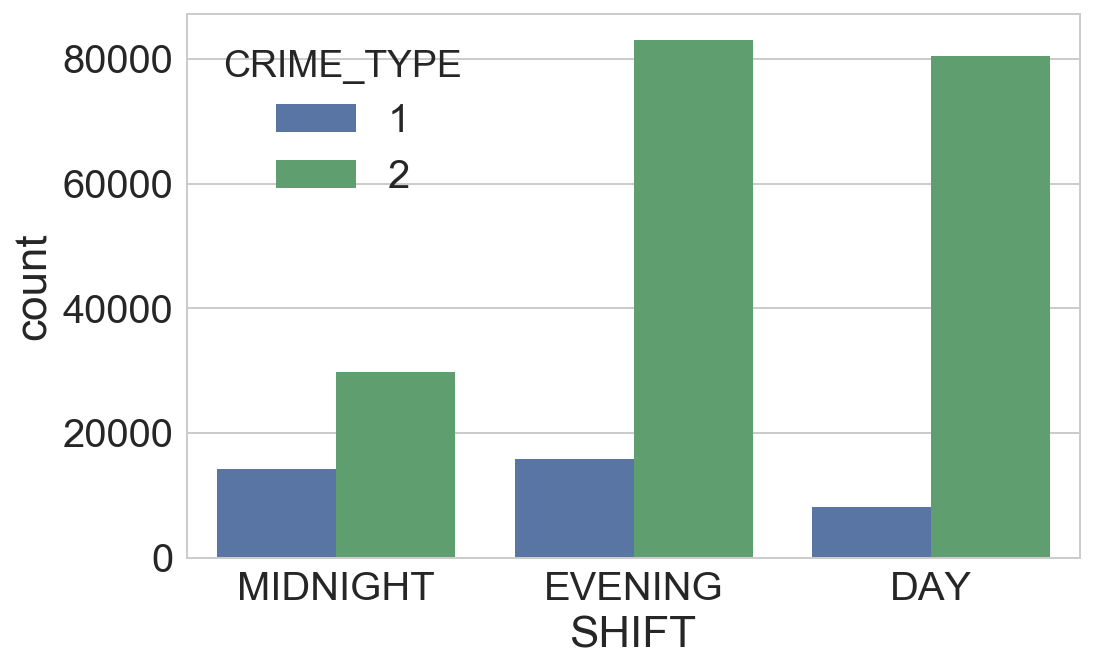

In [3]:
print("---< offenses categorized>----")
tmp = df[['SHIFT', 'CRIME_TYPE']]
plt.figure(figsize=(8, 5))
sns.countplot(x='SHIFT', hue='CRIME_TYPE', data=tmp)

#  1 = Violent, 2 = nonviolent

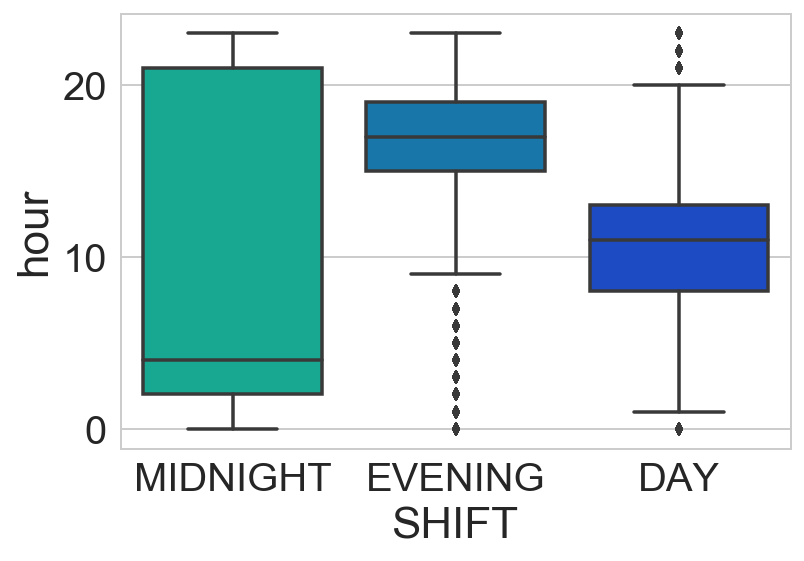

In [4]:
sns.boxplot(x='SHIFT' ,y='hour' ,data=df , palette='winter_r')

### Visualizing crime method used per police district(PSA)

![PSA Map](images/districtmap_2012.jpg "Police District Map")

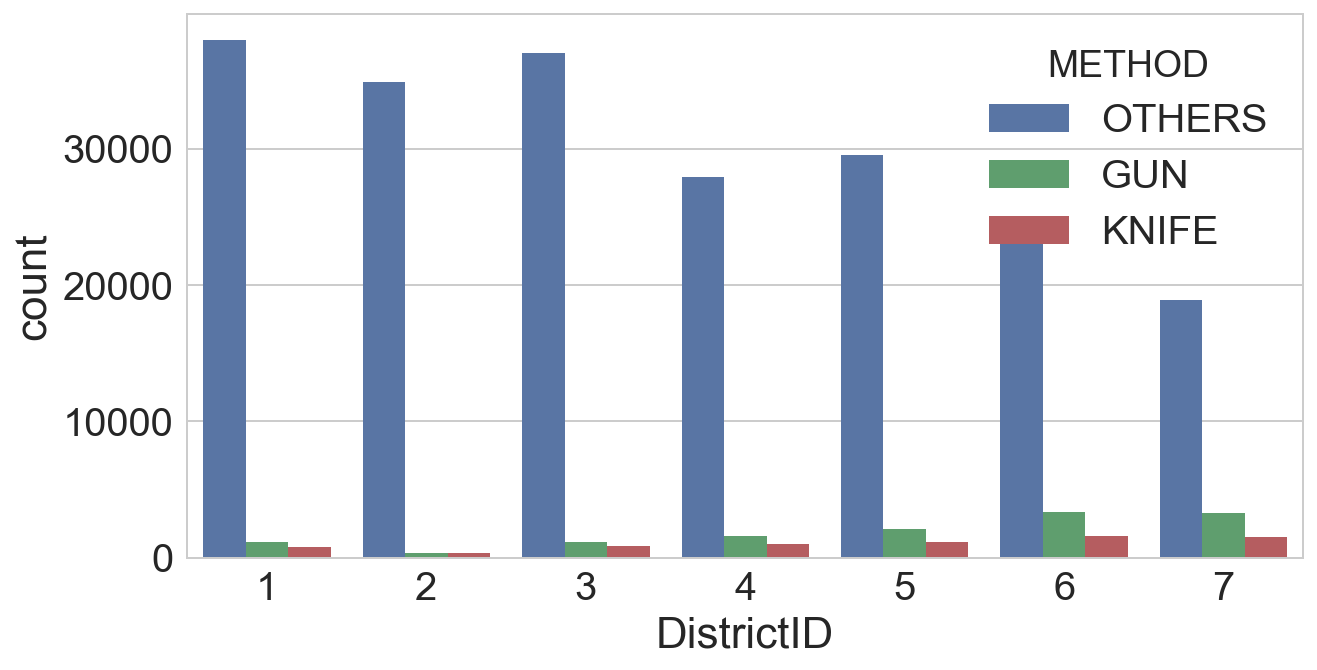

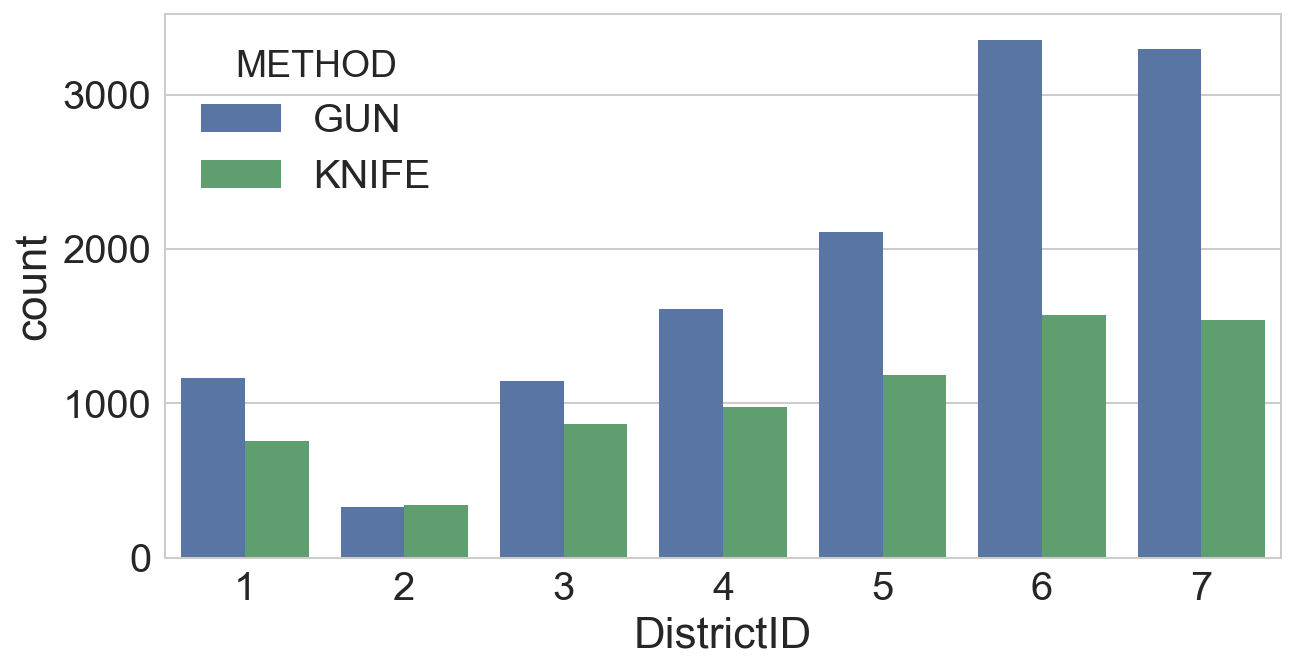

In [5]:
tmp = df[['DistrictID', 'METHOD']]
tmp1 = df[['DistrictID', 'METHOD']]
tmp1 = tmp1[tmp1['METHOD'] != "OTHERS"]

plt.figure(figsize=(10, 5))
sns.countplot(x='DistrictID', hue='METHOD', data=tmp)
plt.figure(figsize=(10, 5))
sns.countplot(x='DistrictID', hue='METHOD', data=tmp1)

#  1 = Others, 2 = Gun, 3 =  Knife

#### Visualizing crimes type per police district(PSA)

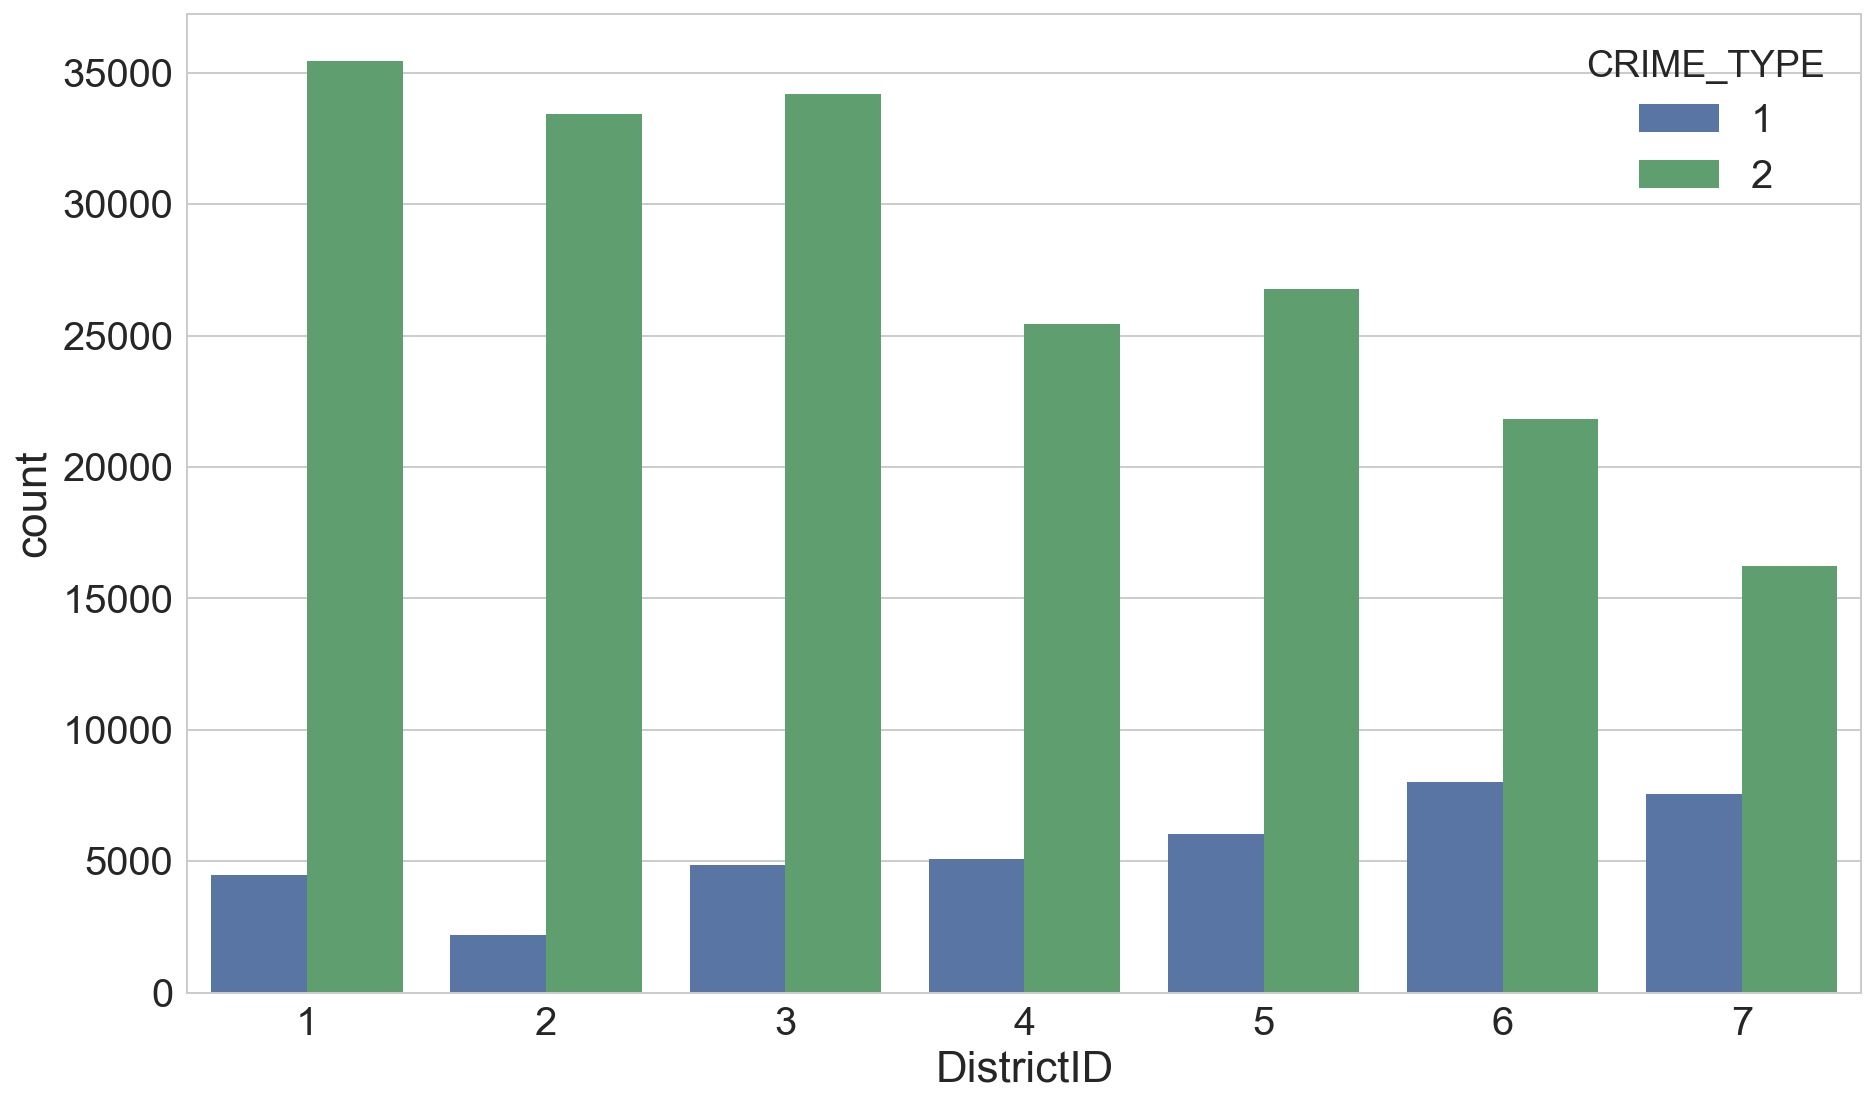

In [6]:
tmp = df[['DistrictID', 'CRIME_TYPE']]
plt.figure(figsize=(15, 9))
sns.countplot(x='DistrictID', hue='CRIME_TYPE', data=tmp)

#  1 = Violent, 2 = nonviolent

#### Visualizing Offense by Police District(PSA)

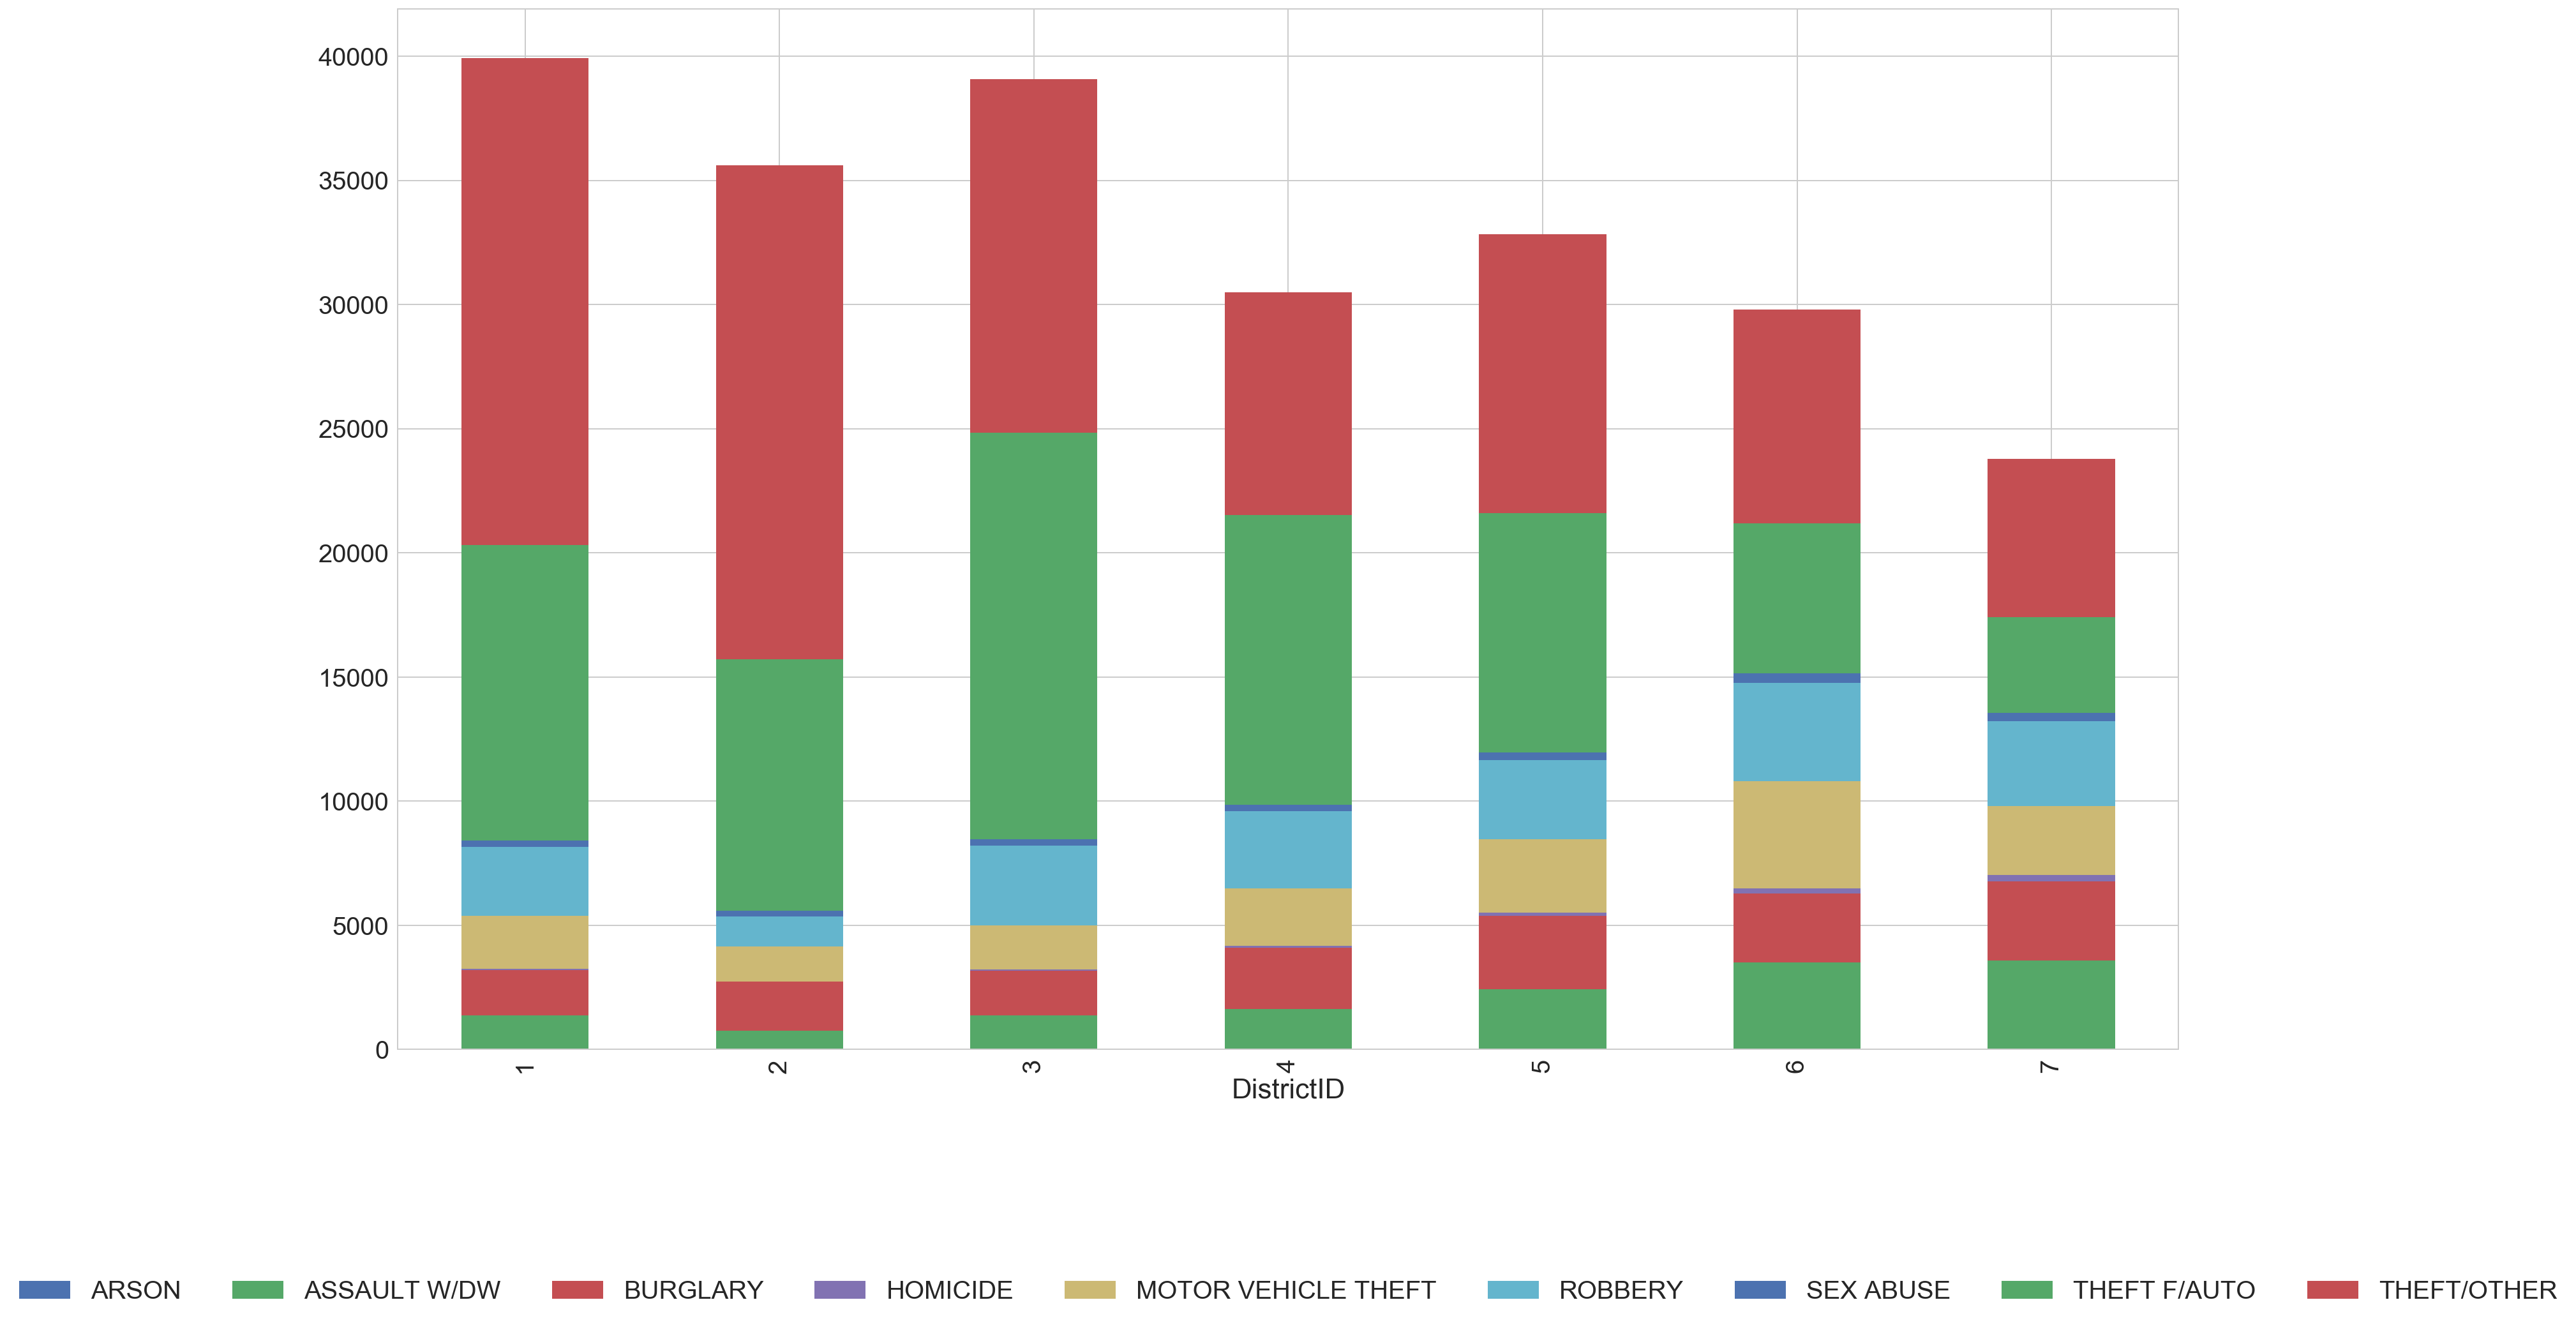

In [7]:
tmp = pd.crosstab(df.DistrictID, df.OFFENSE)
#print tmpdf

tmp.plot(kind='bar', stacked=True, figsize=(25, 15))
plt.legend(loc=9, bbox_to_anchor=(.5, -.2), ncol=9)

# 'theft/other':1, 'theft f/auto':2, 'burglary':3, 'assault w/dangerous weapon':4, 'robbery':5,
# 'motor vehicle theft':6, 'homicide':7, 'sex abuse':8, 'arson':9

In [8]:
# df.hist(column="OFFENSE",by="DistrictID",bins=30)

#####  Visualization  by  crime type per month

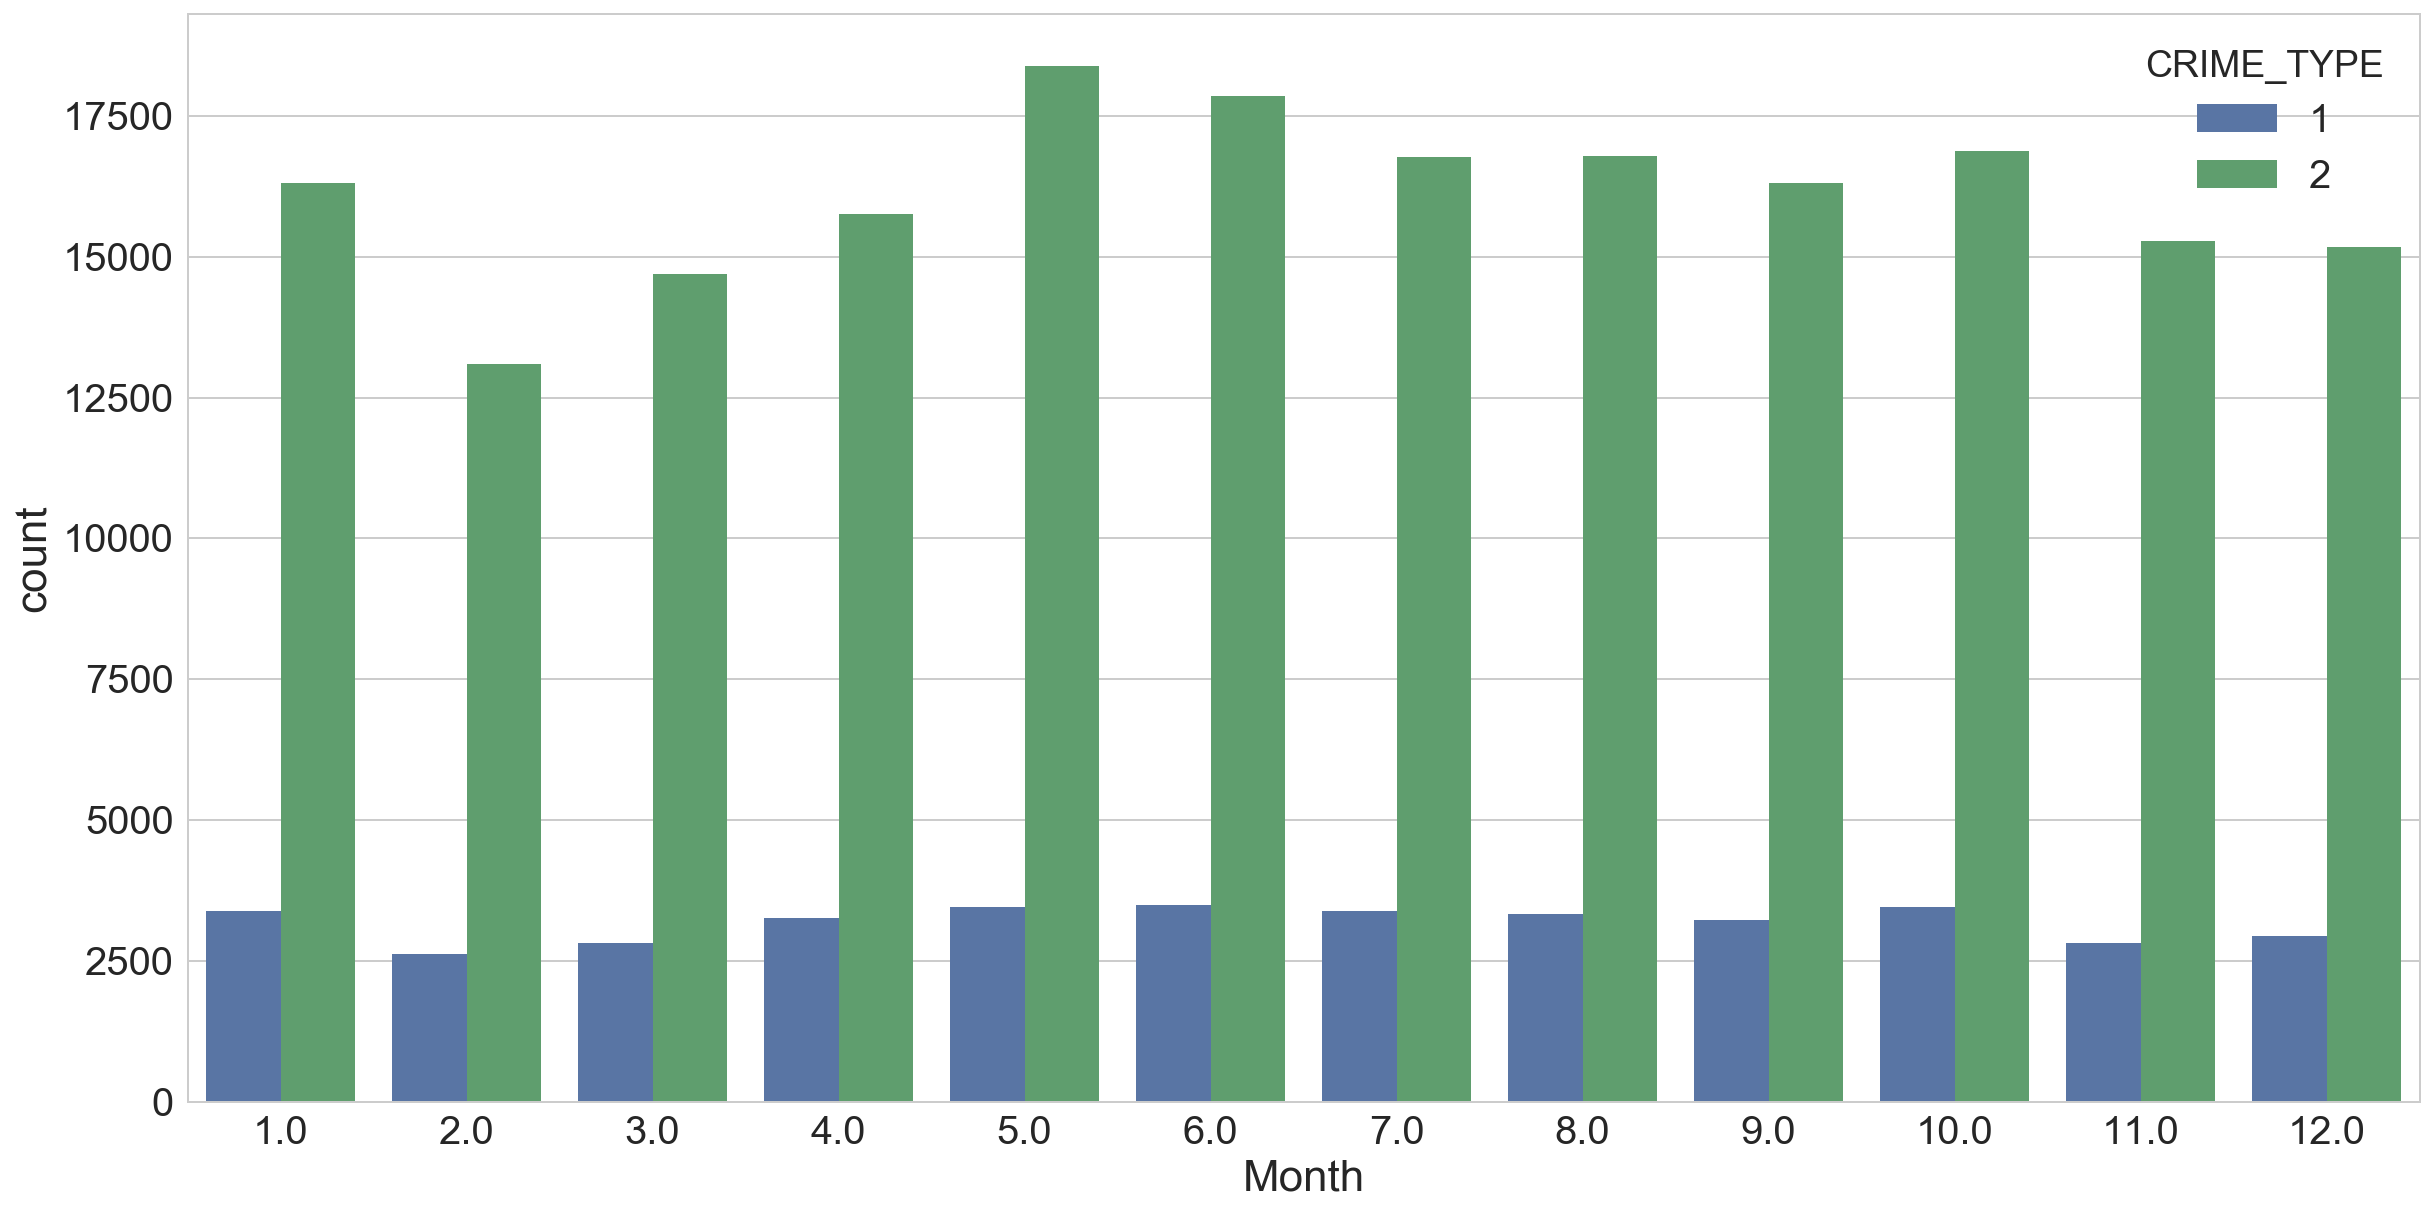

In [10]:
tmp = df[['Month', 'CRIME_TYPE']]
plt.figure(figsize=(20, 10))
sns.countplot(x='Month', hue='CRIME_TYPE', data=tmp)

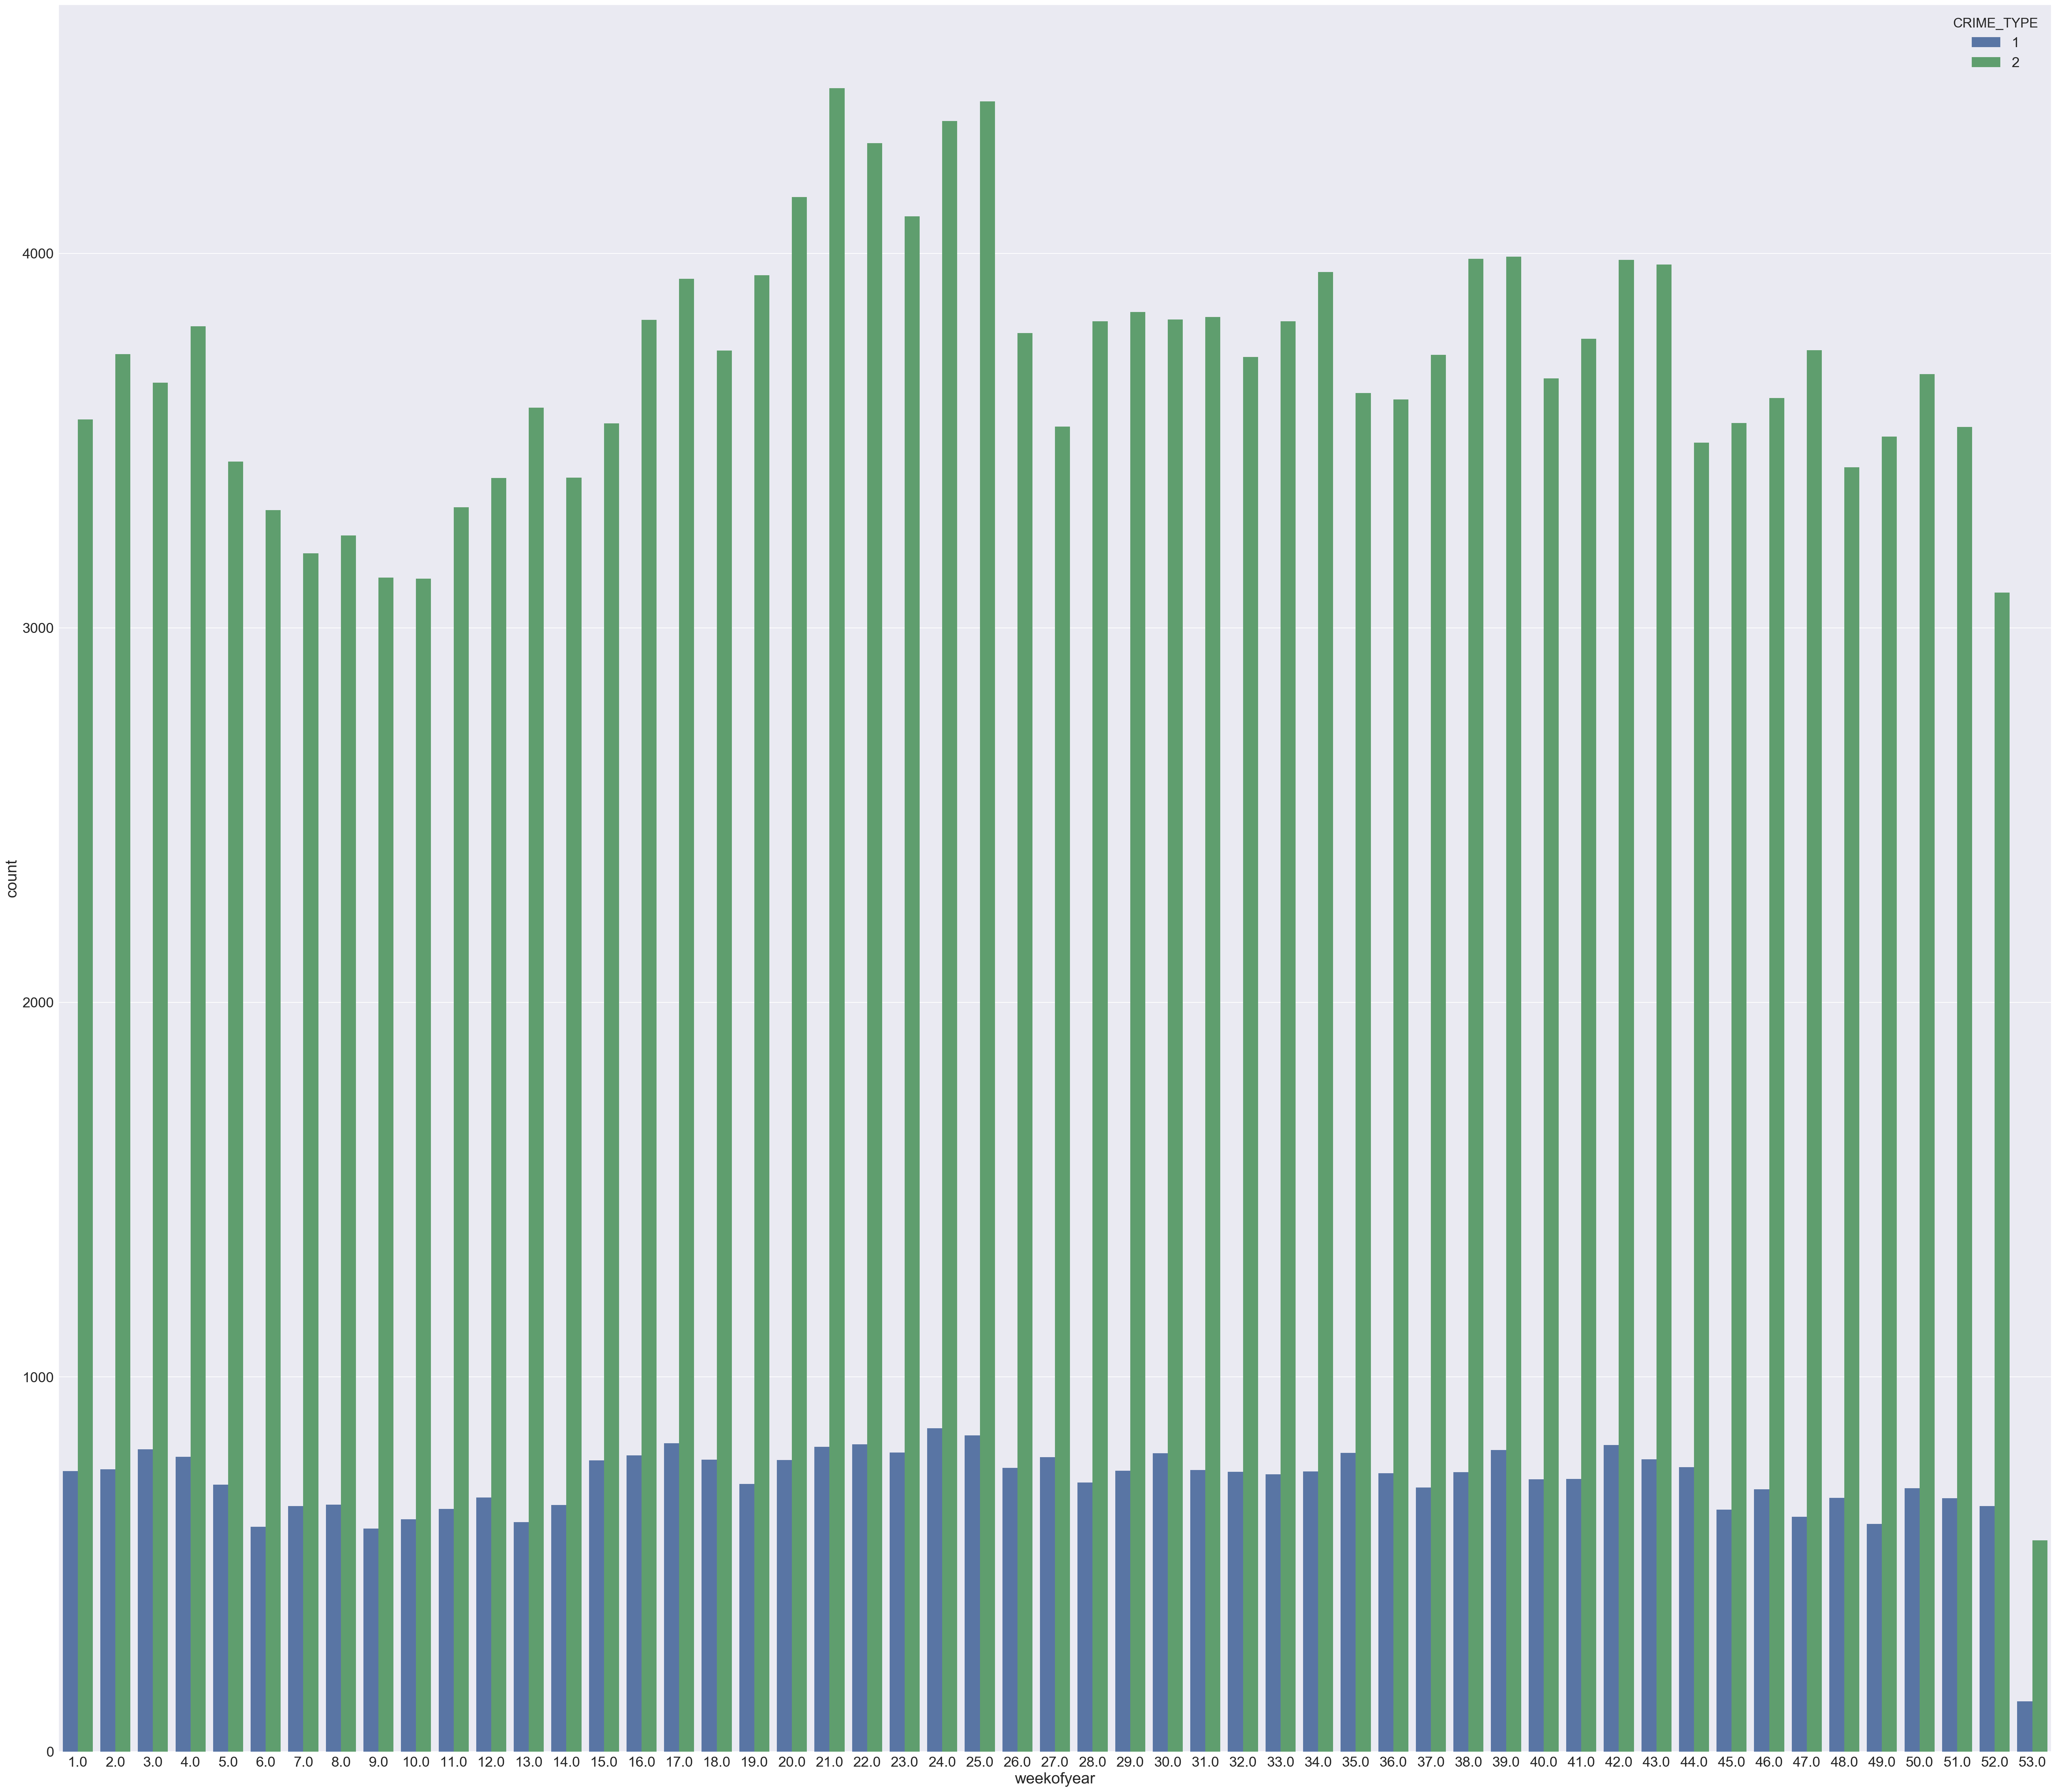

In [41]:
tmp = df[['weekofyear', 'CRIME_TYPE']]
plt.figure(figsize=(50, 45))
sns.countplot(x= 'weekofyear', hue='CRIME_TYPE', data=tmp)

In [43]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'X', 'Y', 'CCN',
       'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'XBLOCK', 'YBLOCK', 'WARD',
       'ANC', 'DISTRICT', 'PSA', 'NEIGHBORHOOD_CLUSTER', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'PSA_ID', 'DistrictID', 'SHIFT_Code',
       'OFFENSE_Code', 'METHOD_Code', 'CRIME_TYPE', 'AGE', 'TIME_TO_REPORT',
       'DATE', 'Year', 'Month', 'Day', 'hour', 'dayofyear', 'week',
       'weekofyear', 'dayofweek', 'weekday', 'quarter'],
      dtype='object')

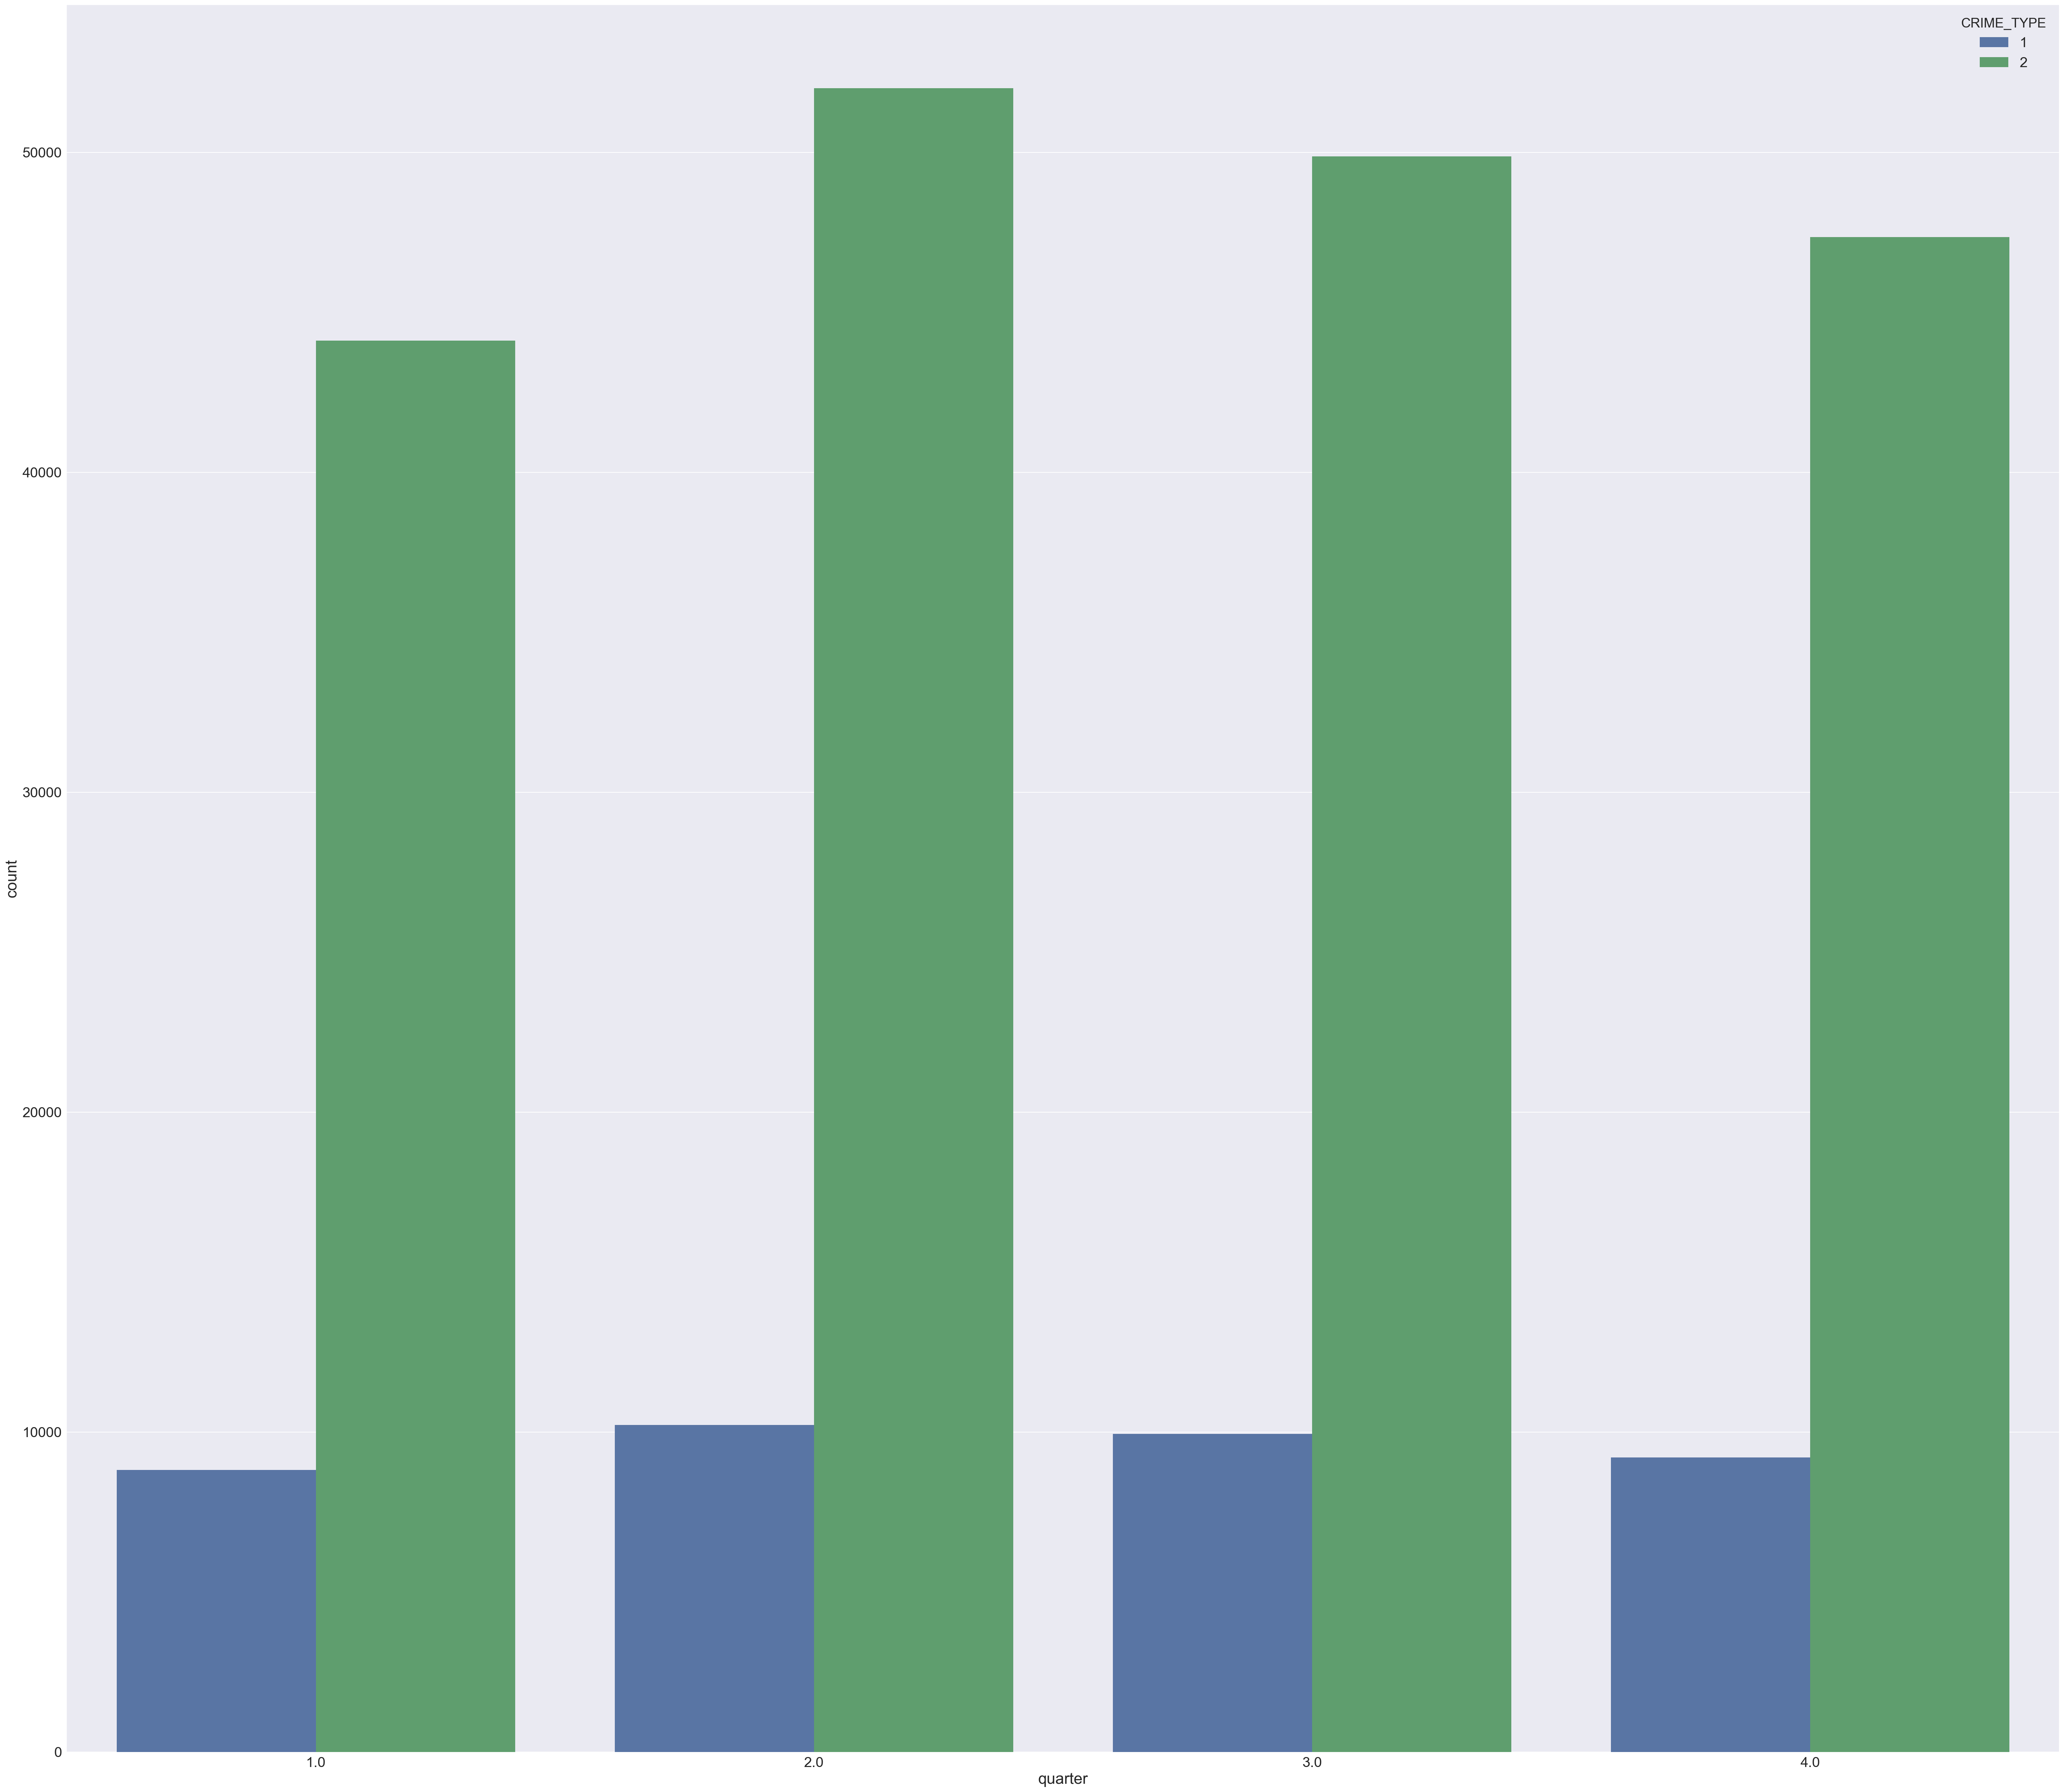

In [44]:
tmp = df[['quarter', 'CRIME_TYPE']]
plt.figure(figsize=(50, 45))
sns.countplot(x= 'quarter', hue='CRIME_TYPE', data=tmp)

The second and third Quaters of the year show significant increase in the number of violenet and non violent crimes in the Metropolitant district, which is basically intitutive to understand that as the weather condition improves

##### Relationships between attributes

 #### Offense by Police Shift

In [14]:
# shift = {'day':1, 'evening':2, 'midnight':3}

# https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
def percentConv(x):
    return x / float(sum(x))

print( pd.crosstab(df.OFFENSE, df.SHIFT).apply(percentConv, axis=1))

SHIFT                     DAY   EVENING  MIDNIGHT
OFFENSE                                          
ARSON                0.322835  0.307087  0.370079
ASSAULT W/DW         0.217855  0.414372  0.367773
BURGLARY             0.376245  0.445682  0.178073
HOMICIDE             0.000000  0.000000  1.000000
MOTOR VEHICLE THEFT  0.466298  0.341764  0.191939
ROBBERY              0.213772  0.432720  0.353508
SEX ABUSE            0.280543  0.378079  0.341378
THEFT F/AUTO         0.473004  0.356574  0.170421
THEFT/OTHER          0.370342  0.501619  0.128039


### Crime Type by Police District

In [15]:
print (pd.crosstab(df.DistrictID, df.CRIME_TYPE, margins=True))
print ('-----------------------------------------------------')
print (pd.crosstab(df.DistrictID, df.CRIME_TYPE).apply(percentConv, axis=1))

print('---------------------------------------------------------------') 
print ('Percentage of Crime in each District')
print("======================================")
tmp_total = df.DistrictID.value_counts().sum()
print(df.DistrictID.value_counts() / tmp_total)

#  1 = Violent, 2 = nonviolent

CRIME_TYPE      1       2     All
DistrictID                       
1            4458   35458   39916
2            2183   33416   35599
3            4871   34205   39076
4            5075   25424   30499
5            6044   26784   32828
6            7996   21813   29809
7            7539   16236   23775
All         38166  193336  231502
-----------------------------------------------------
CRIME_TYPE         1         2
DistrictID                    
1           0.111685  0.888315
2           0.061322  0.938678
3           0.124655  0.875345
4           0.166399  0.833601
5           0.184111  0.815889
6           0.268241  0.731759
7           0.317098  0.682902
---------------------------------------------------------------
Percentage of Crime in each District
1    0.172422
3    0.168793
2    0.153774
5    0.141804
4    0.131744
6    0.128763
7    0.102699
Name: DistrictID, dtype: float64


Based on the above crosstabulation of Crime Type Offense by Police District(PSA) and percentage of crime in each district shows that district 7 is the safest by a factor of 1.7 compared to the unsafest district 1(0.17 vs0.1). 7% of the crimes are violent compared to nonviolent(92%) in district one.

##### Offense by Method

In [16]:
print("===============================================")
print (pd.crosstab(df.OFFENSE, df.METHOD, margins=True))
print("================================================")

METHOD                 GUN  KNIFE  OTHERS     All
OFFENSE                                          
ARSON                    0      0     127     127
ASSAULT W/DW          4428   5493    4607   14528
BURGLARY               230     77   16658   16965
HOMICIDE               570    100     111     781
MOTOR VEHICLE THEFT      5      2   17707   17714
ROBBERY               7602   1382   11884   20868
SEX ABUSE              119    117    1753    1989
THEFT F/AUTO            14      8   69582   69604
THEFT/OTHER             35     55   88836   88926
All                  13003   7234  211265  231502


In [17]:
print("==========================================================")
print(pd.crosstab(df.OFFENSE, df.METHOD).apply(percentConv, axis=1))
print("==========================================================")

METHOD                    GUN     KNIFE    OTHERS
OFFENSE                                          
ARSON                0.000000  0.000000  1.000000
ASSAULT W/DW         0.304791  0.378097  0.317112
BURGLARY             0.013557  0.004539  0.981904
HOMICIDE             0.729834  0.128041  0.142125
MOTOR VEHICLE THEFT  0.000282  0.000113  0.999605
ROBBERY              0.364290  0.066226  0.569484
SEX ABUSE            0.059829  0.058824  0.881347
THEFT F/AUTO         0.000201  0.000115  0.999684
THEFT/OTHER          0.000394  0.000618  0.998988


###### Crime by Days of the week

In [18]:
print("==============================================================================================================")
# 0 = Monday, 6 = Sunday

# set index to the start of the crime
g = df.dayofweek
print( pd.crosstab(df.OFFENSE, g, colnames=['dayofweek'], margins=True))
print("==============================================================================================================")
print(pd.crosstab(df.OFFENSE, g, colnames=['dayofweek']).apply(percentConv, axis=1))
print("============================================================================================================")
#                    MON      TUE    WED     THU   FRI   SAT   SUN      All weeks aggregate

dayofweek              0.0    1.0    2.0    3.0    4.0    5.0    6.0     All
OFFENSE                                                                     
ARSON                   21     17     21     20     12     25     11     127
ASSAULT W/DW          1868   1976   1940   1854   1998   2495   2397   14528
BURGLARY              2936   2718   2657   2501   2553   1855   1745   16965
HOMICIDE               104     88    104    116    107    137    125     781
MOTOR VEHICLE THEFT   2782   2431   2362   2274   2383   2737   2745   17714
ROBBERY               2918   2877   2873   2743   2939   3300   3218   20868
SEX ABUSE              277    237    233    241    269    362    368    1987
THEFT F/AUTO          9623   9433   9358   9168  10092  10967  10963   69604
THEFT/OTHER          13383  12984  13049  12837  13181  12259  11233   88926
All                  33912  32761  32597  31754  33534  34137  32805  231500
dayofweek                 0.0       1.0       2.0       3.0       4.0  \
OFF

######  Relationships between features and  the target variable for prediction (i.e., relationships with variables and the target classification).

#### Reporting  times per offense type
       
       `For clarity purposes, we report only those values that are greater than 0 and less than 86400 (seconds = 1 day).`

==========================Reporting  times per offense type==============================================


/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


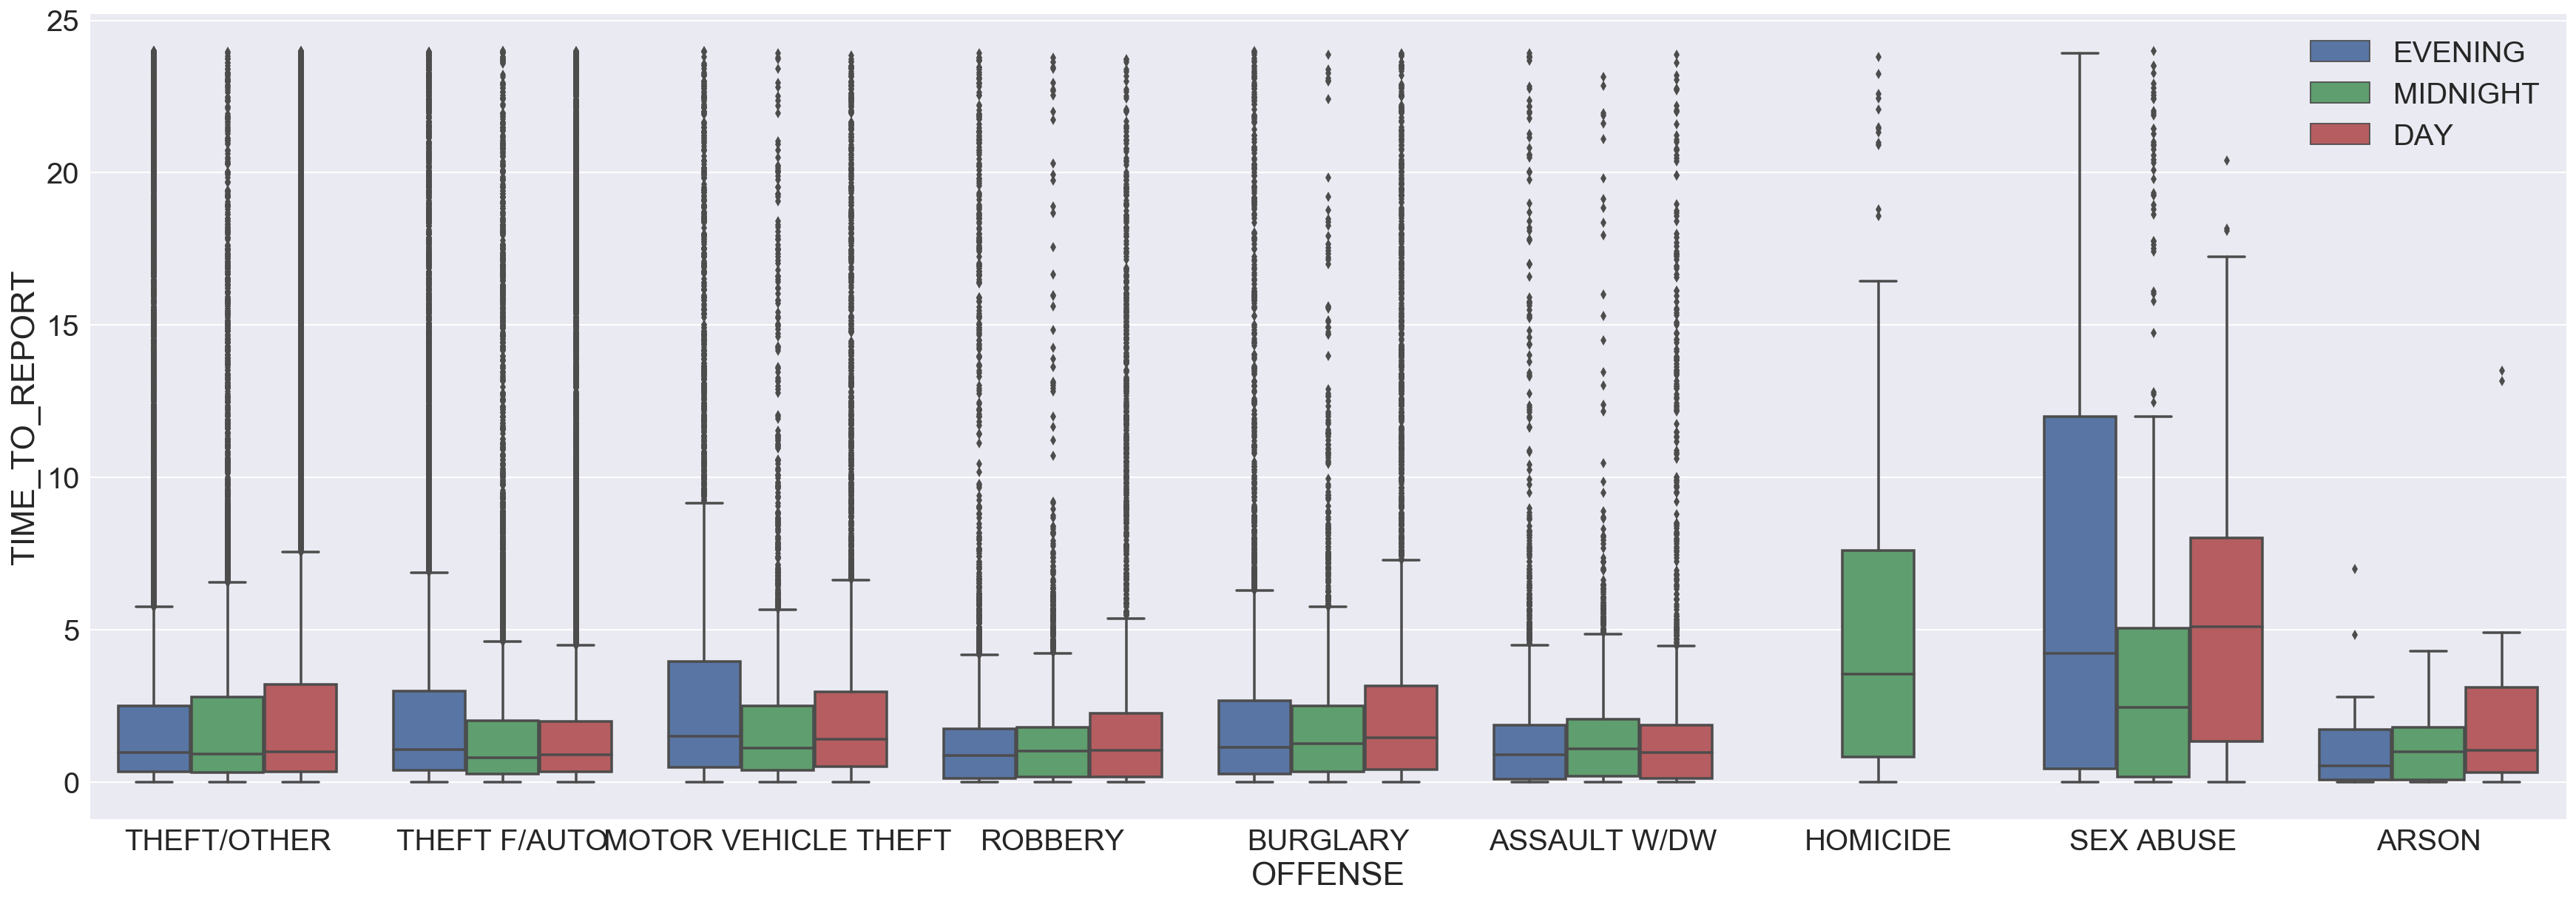

In [19]:
print("==========================Reporting  times per offense type==============================================")
# Set up a wide chart so we can see the separation between offenses
plt.figure(figsize=(30,10))

# Default font was too small to make out the Offense, so scale it
sns.set(font_scale=2)

# Create a subset with data from 0 to 24 hours response times
plt_test = df[df.TIME_TO_REPORT < 86400][df.TIME_TO_REPORT > 0]

# Create the box plot - report the response time in hours instead of seconds.  Group by Offense, and color by Shift
sns.boxplot(x=plt_test.OFFENSE, y=plt_test.TIME_TO_REPORT/3600.0, hue=plt_test.SHIFT)

# Move the legend out of the way
plt.legend(loc='upper right')


####  Reporting times  when a Dangerous Weapon is involved

========================== Reporting times  when a Dangerous Weapon is involved==============================


/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


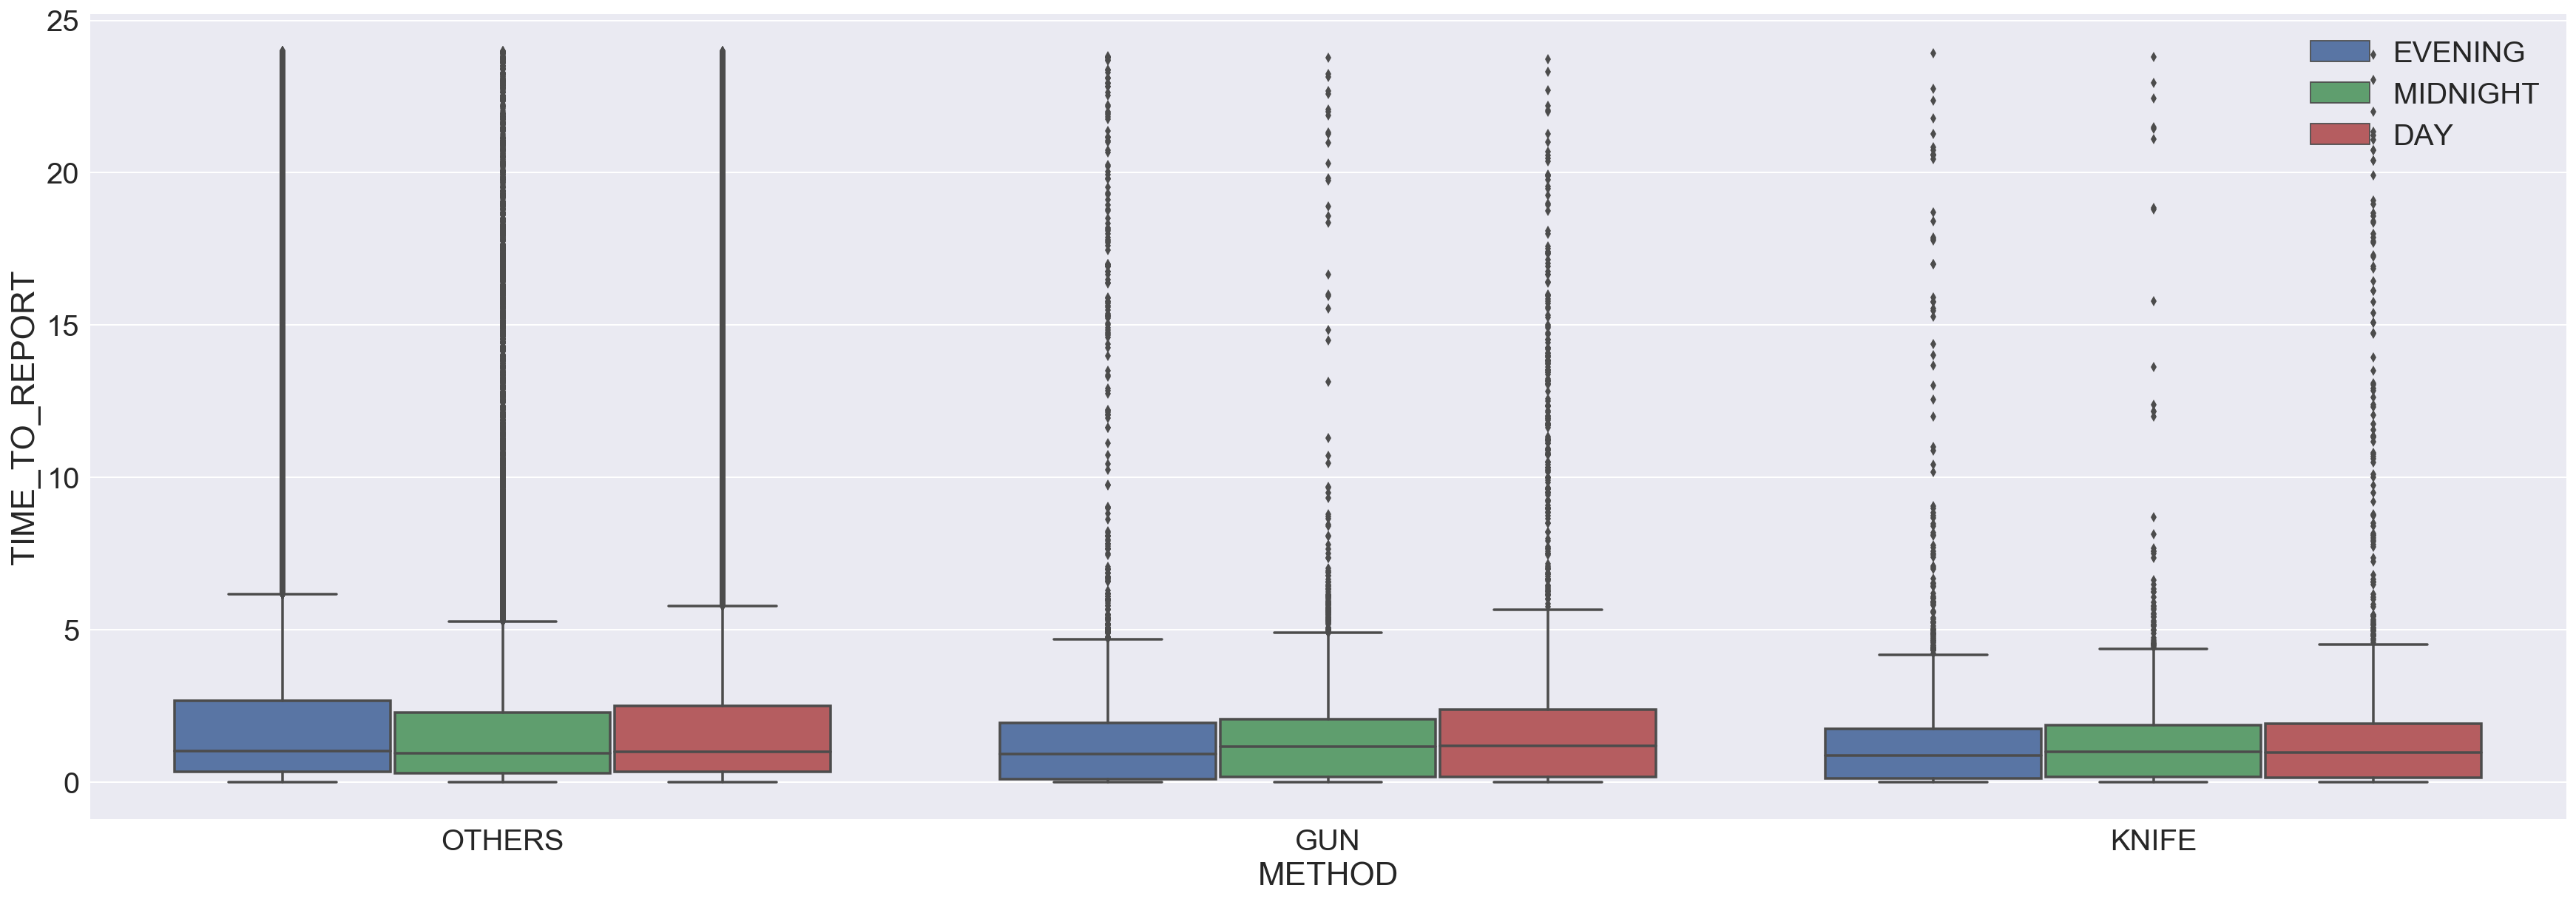

In [20]:
print("========================== Reporting times  when a Dangerous Weapon is involved==============================")
# Set up a wide chart so we can see the separation between offenses
plt.figure(figsize=(30,10))

# Default font was too small to make out the labels, so scale it
sns.set(font_scale=2)

# Create a subset with data from 0 to 24 hours response times
plt_test = df[df.TIME_TO_REPORT < 86400][df.TIME_TO_REPORT > 0]

# Create the box plot - report the response time in hours instead of seconds.  Group by Method, and color by Shift
sns.boxplot(x=plt_test.METHOD, y=plt_test.TIME_TO_REPORT/3600.0, hue=plt_test.SHIFT)

# Move the legend out of the way
plt.legend(loc='upper right')

##### Reporting times  per District and Shift?


========================== Reporting times  per District and Shift==============================


/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


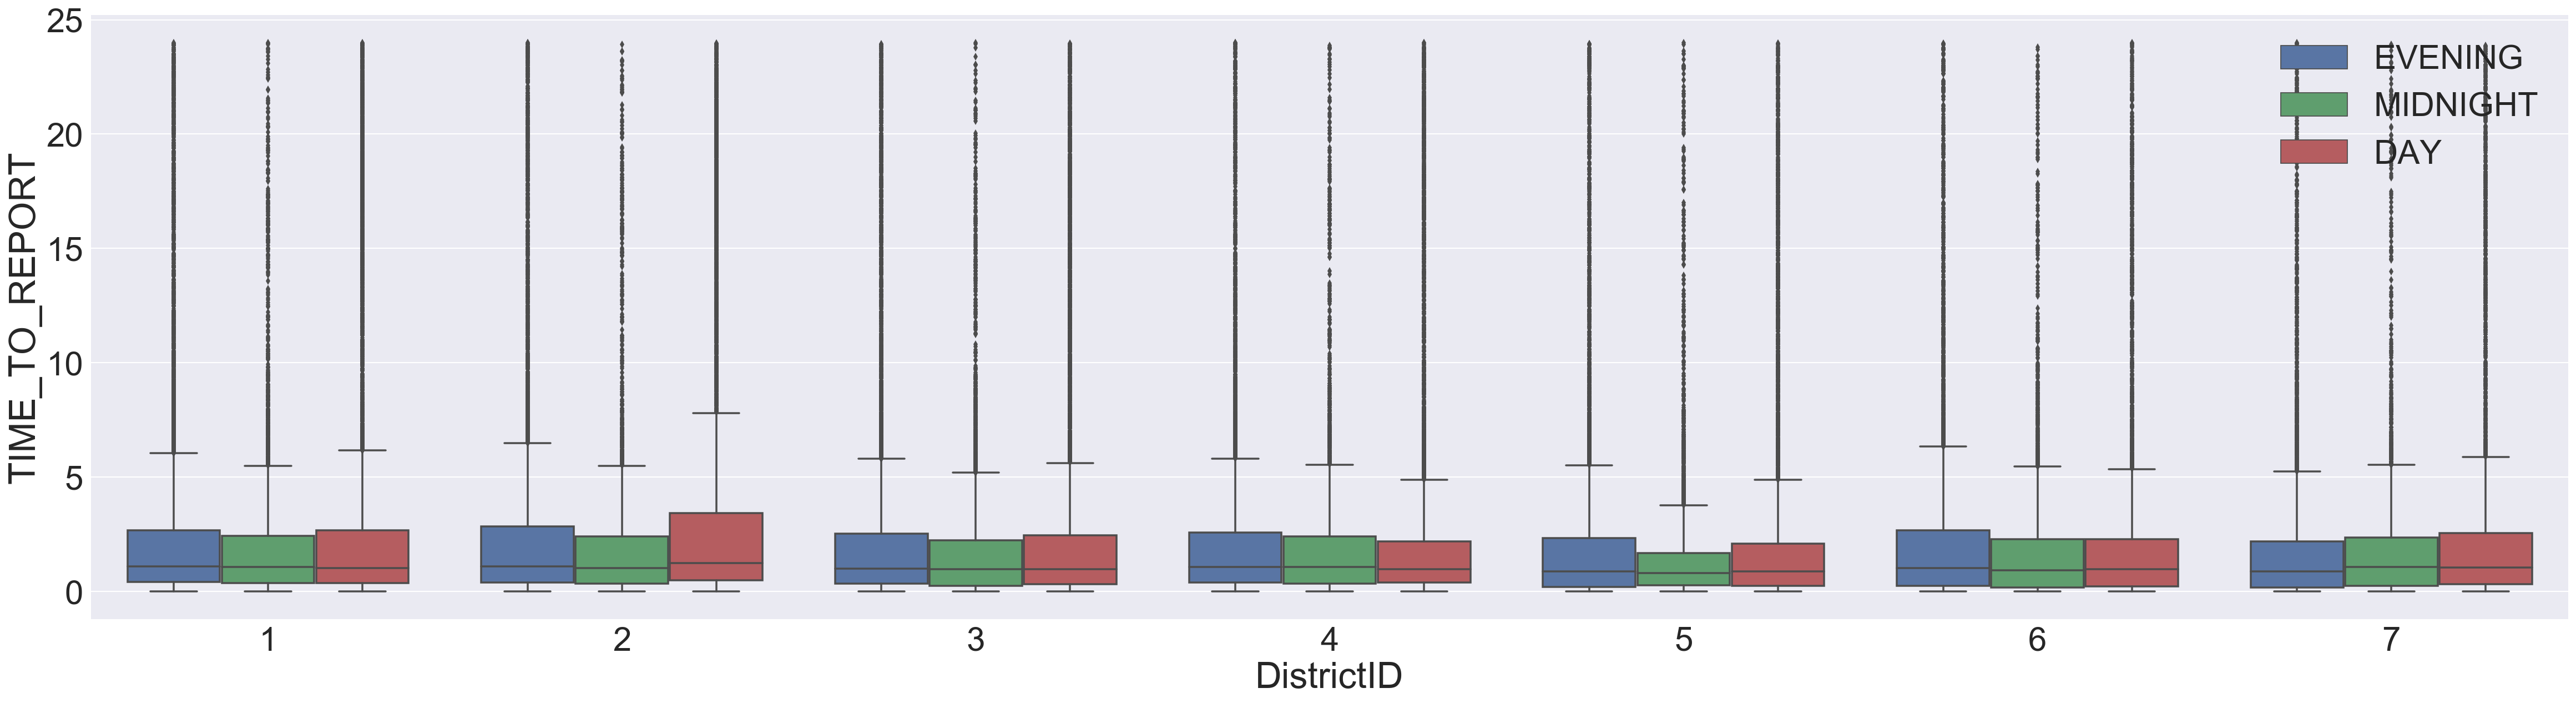

In [21]:
print("========================== Reporting times  per District and Shift==============================")
plt.figure(figsize=(40,10))
sns.set(font_scale=3)
#
# Filter data to just within a 24-hour period
plt_test = df[df.TIME_TO_REPORT < 86400][df.TIME_TO_REPORT > 0]

# Display response time in hours (3600 seconds)
sns.boxplot(x=plt_test.DistrictID, y=plt_test.TIME_TO_REPORT/3600.0, hue=plt_test.SHIFT)
plt.legend(loc='upper right')

###   Violent Crime by Location

========================== Plot of violent crimes==========================================================


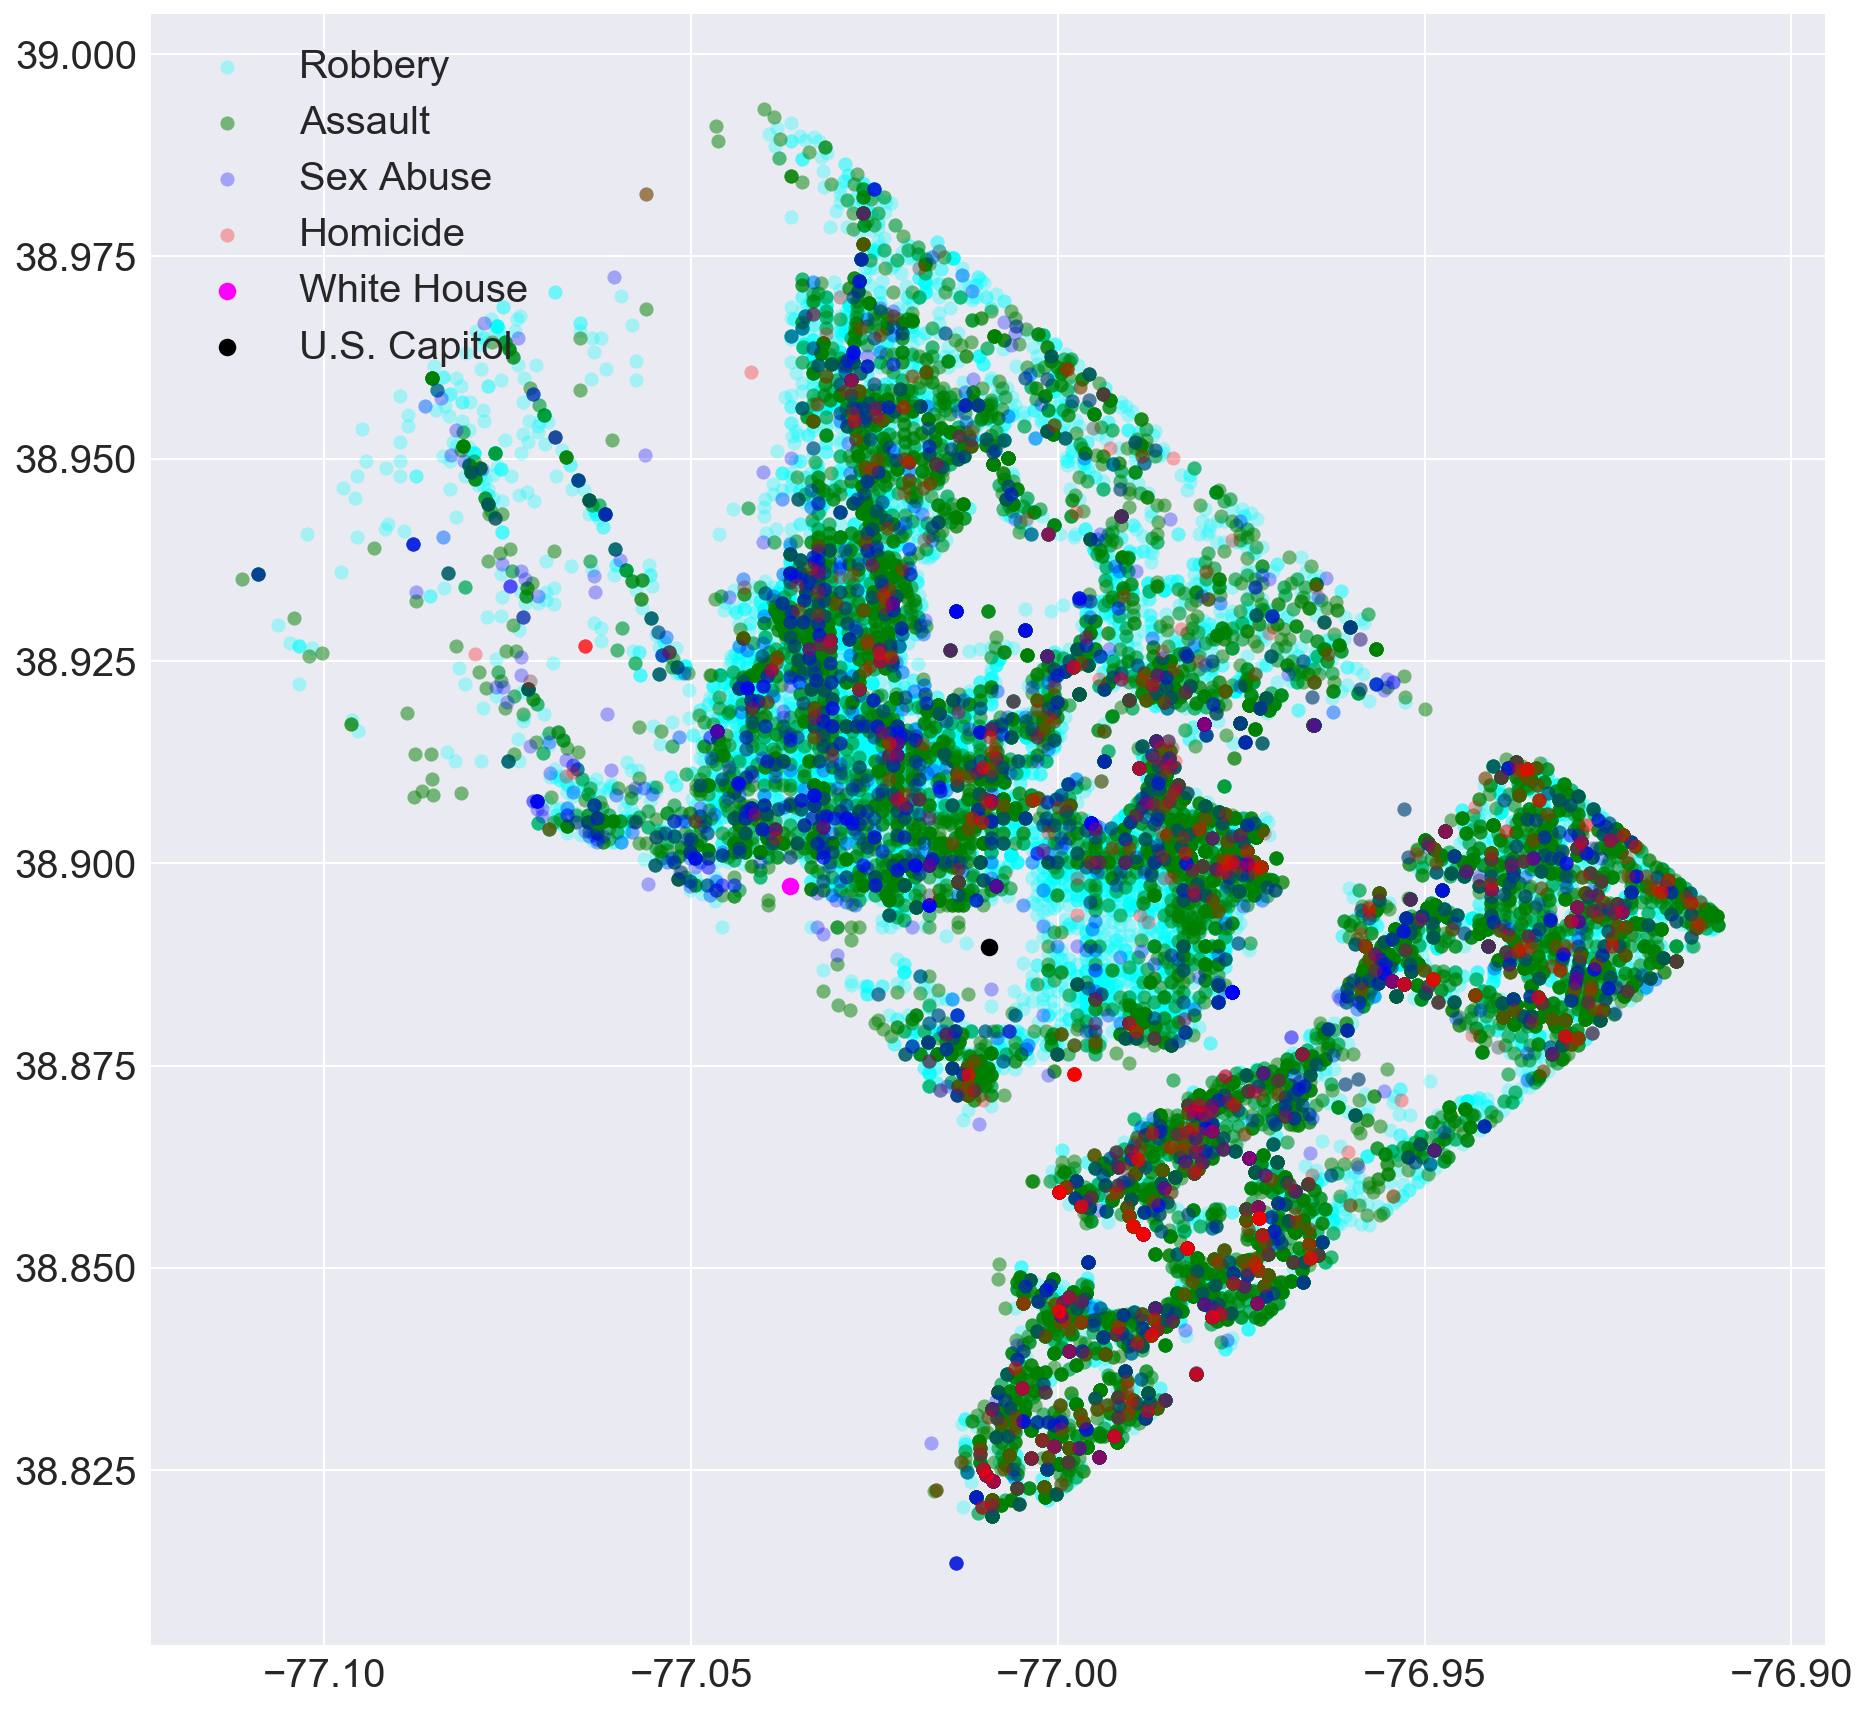

========================== Plot of violent crimes===========================================================


In [22]:
print("========================== Plot of violent crimes==========================================================")
plt.figure(figsize=(15, 15))
sns.set(font_scale=2)
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='ROBBERY'], df['LATITUDE'][df['OFFENSE']=='ROBBERY'], s=50, alpha=0.3, color=[0.0,1.0,1.0], lw=0, label='Robbery')
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='ASSAULT W/DW'], df['LATITUDE'][df['OFFENSE']=='ASSAULT W/DW'], s=50, alpha=0.5, color='g', lw=0, label='Assault')
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='SEX ABUSE'], df['LATITUDE'][df['OFFENSE']=='SEX ABUSE'], s=50, alpha=0.3, color='b', lw=0, label='Sex Abuse')
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='HOMICIDE'], df['LATITUDE'][df['OFFENSE']=='HOMICIDE'], s=50, alpha=0.3, color='r', lw=0, label='Homicide')
plt.scatter(-77.03654,38.89722,s=60, color=[1,0,1], lw=1, label='White House')
plt.scatter(-77.00937,38.88968,s=60, color=[0,0,0], lw=1, label='U.S. Capitol')
plt.legend(loc='upper left')
plt.show()
print("========================== Plot of violent crimes===========================================================")

========================== Plot of violent crimes=============================================================


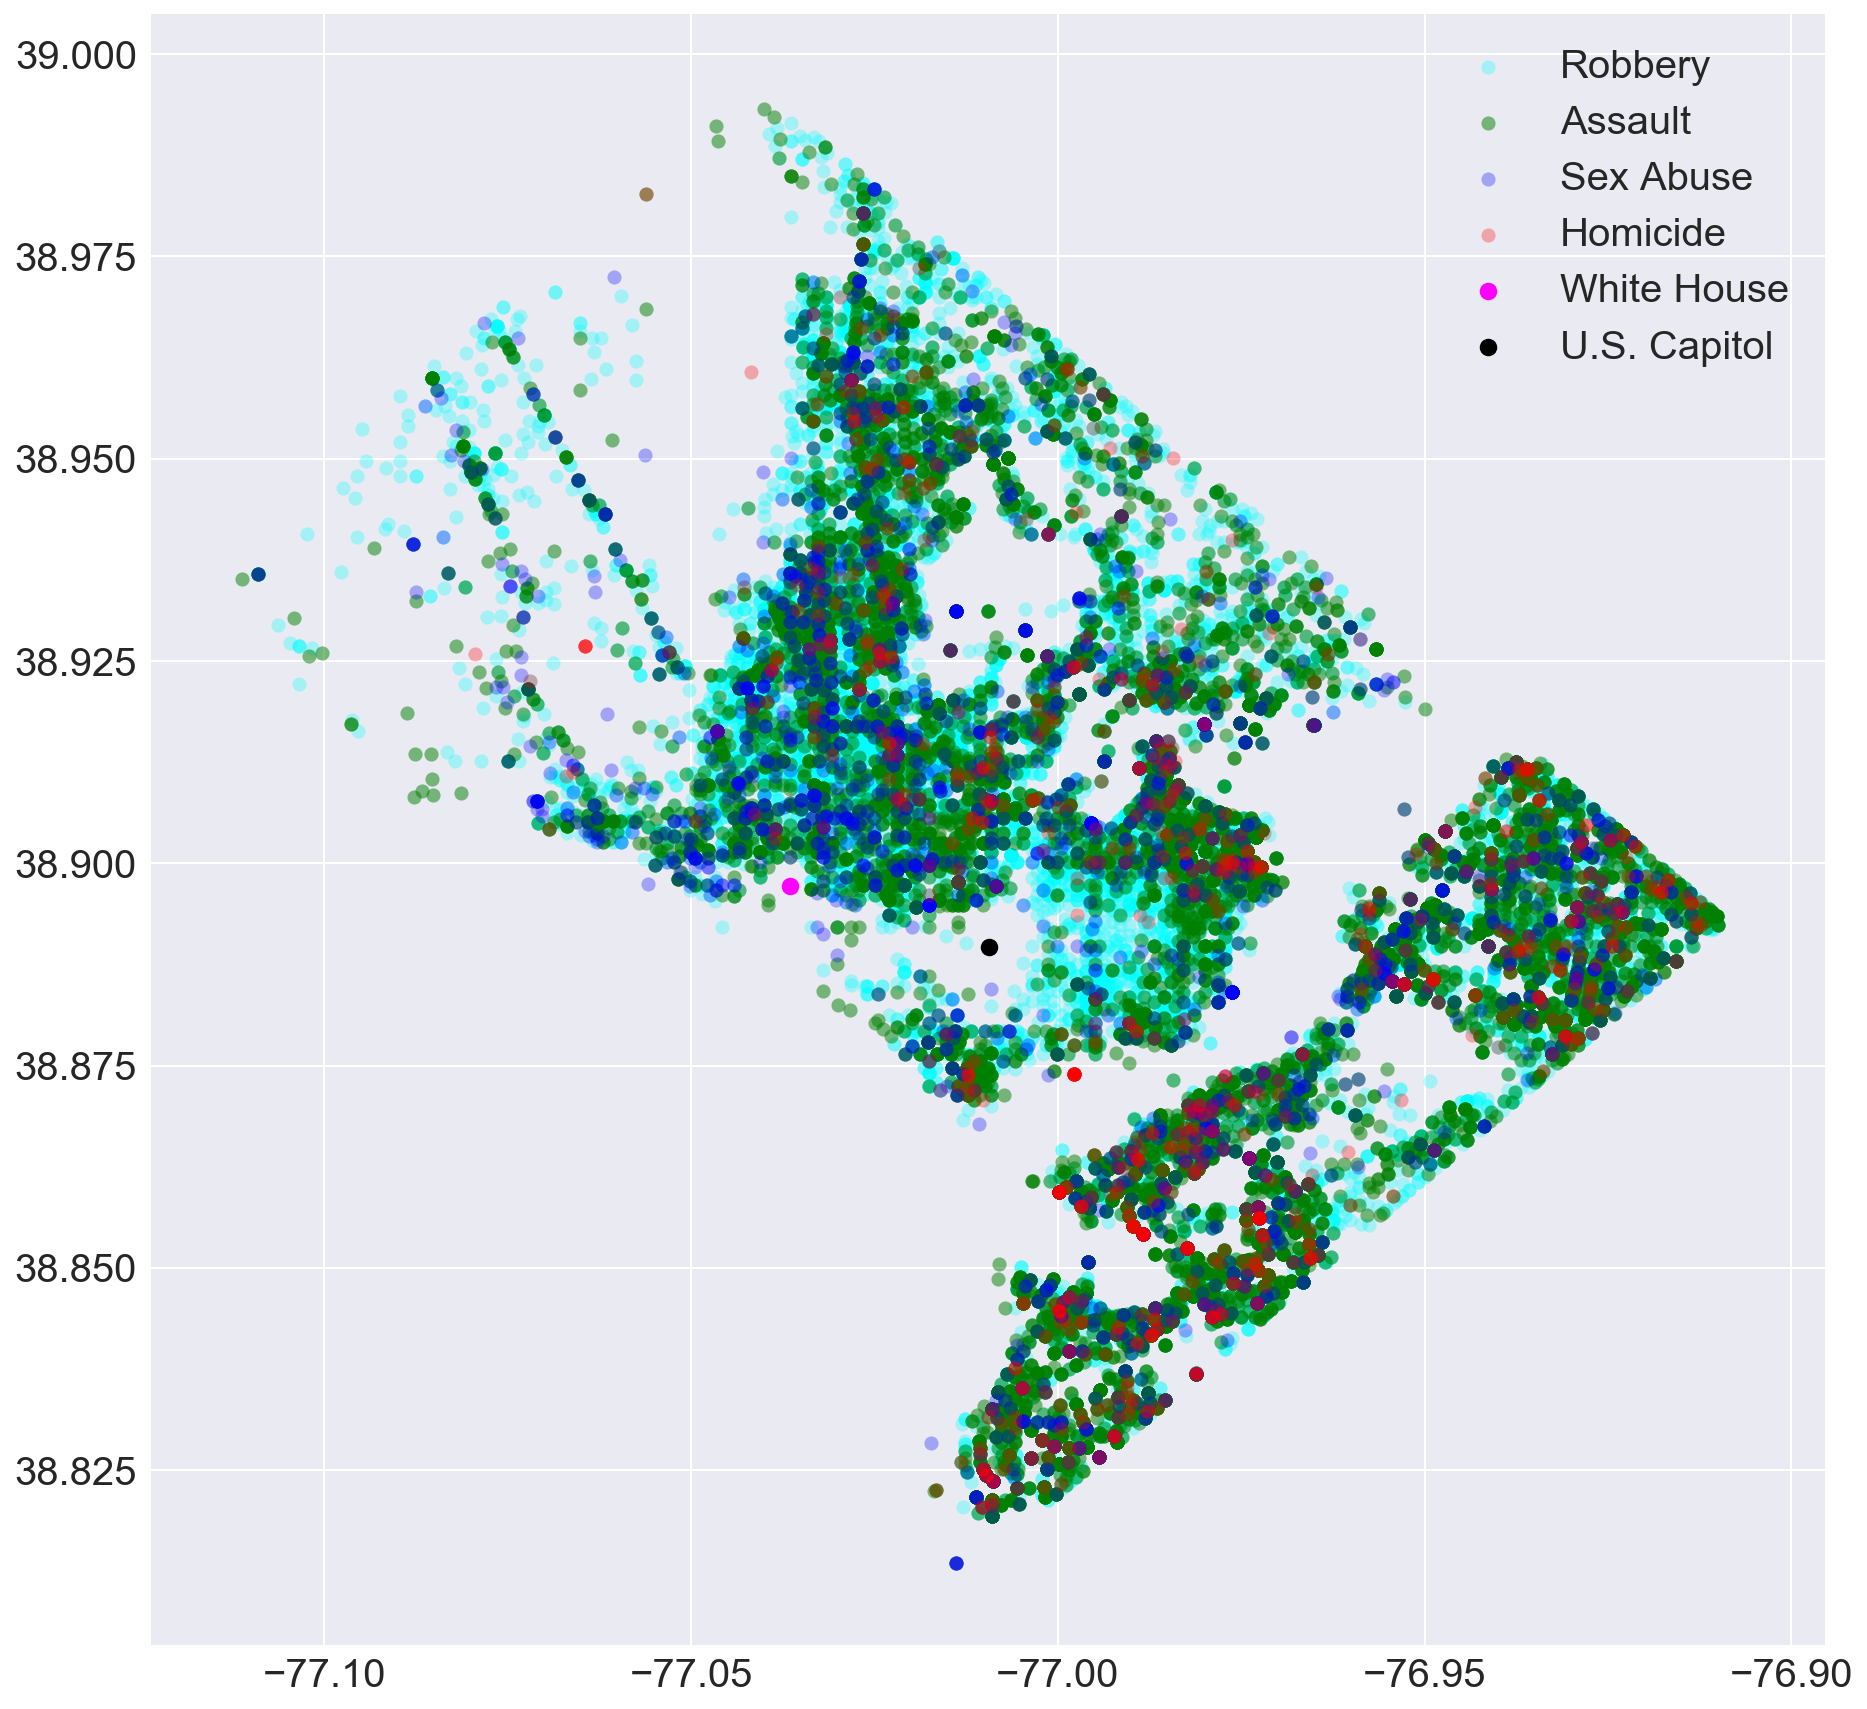

========================== violent crimes in Washington DC ====================================================


In [23]:
print("========================== Plot of violent crimes=============================================================")
plt.figure(figsize=(15, 15))
sns.set(font_scale=2)
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='ROBBERY'], df['LATITUDE'][df['OFFENSE']=='ROBBERY'], s=50, alpha=0.3, color=[0.0,1.0,1.0], lw=0, label='Robbery')
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='ASSAULT W/DW'], df['LATITUDE'][df['OFFENSE']=='ASSAULT W/DW'], s=50, alpha=0.5, color='g', lw=0, label='Assault')
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='SEX ABUSE'], df['LATITUDE'][df['OFFENSE']=='SEX ABUSE'], s=50, alpha=0.3, color='b', lw=0, label='Sex Abuse')
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='HOMICIDE'], df['LATITUDE'][df['OFFENSE']=='HOMICIDE'], s=50, alpha=0.3, color='r', lw=0, label='Homicide')
plt.scatter(-77.03654,38.89722,s=60, color=[1,0,1], lw=1, label='White House')
plt.scatter(-77.00937,38.88968,s=60, color=[0,0,0], lw=1, label='U.S. Capitol')
plt.legend(loc='upper right')
plt.show()
print("========================== violent crimes in Washington DC ====================================================")

========================== Plot of violent[ROBBERY]crimes====================================================


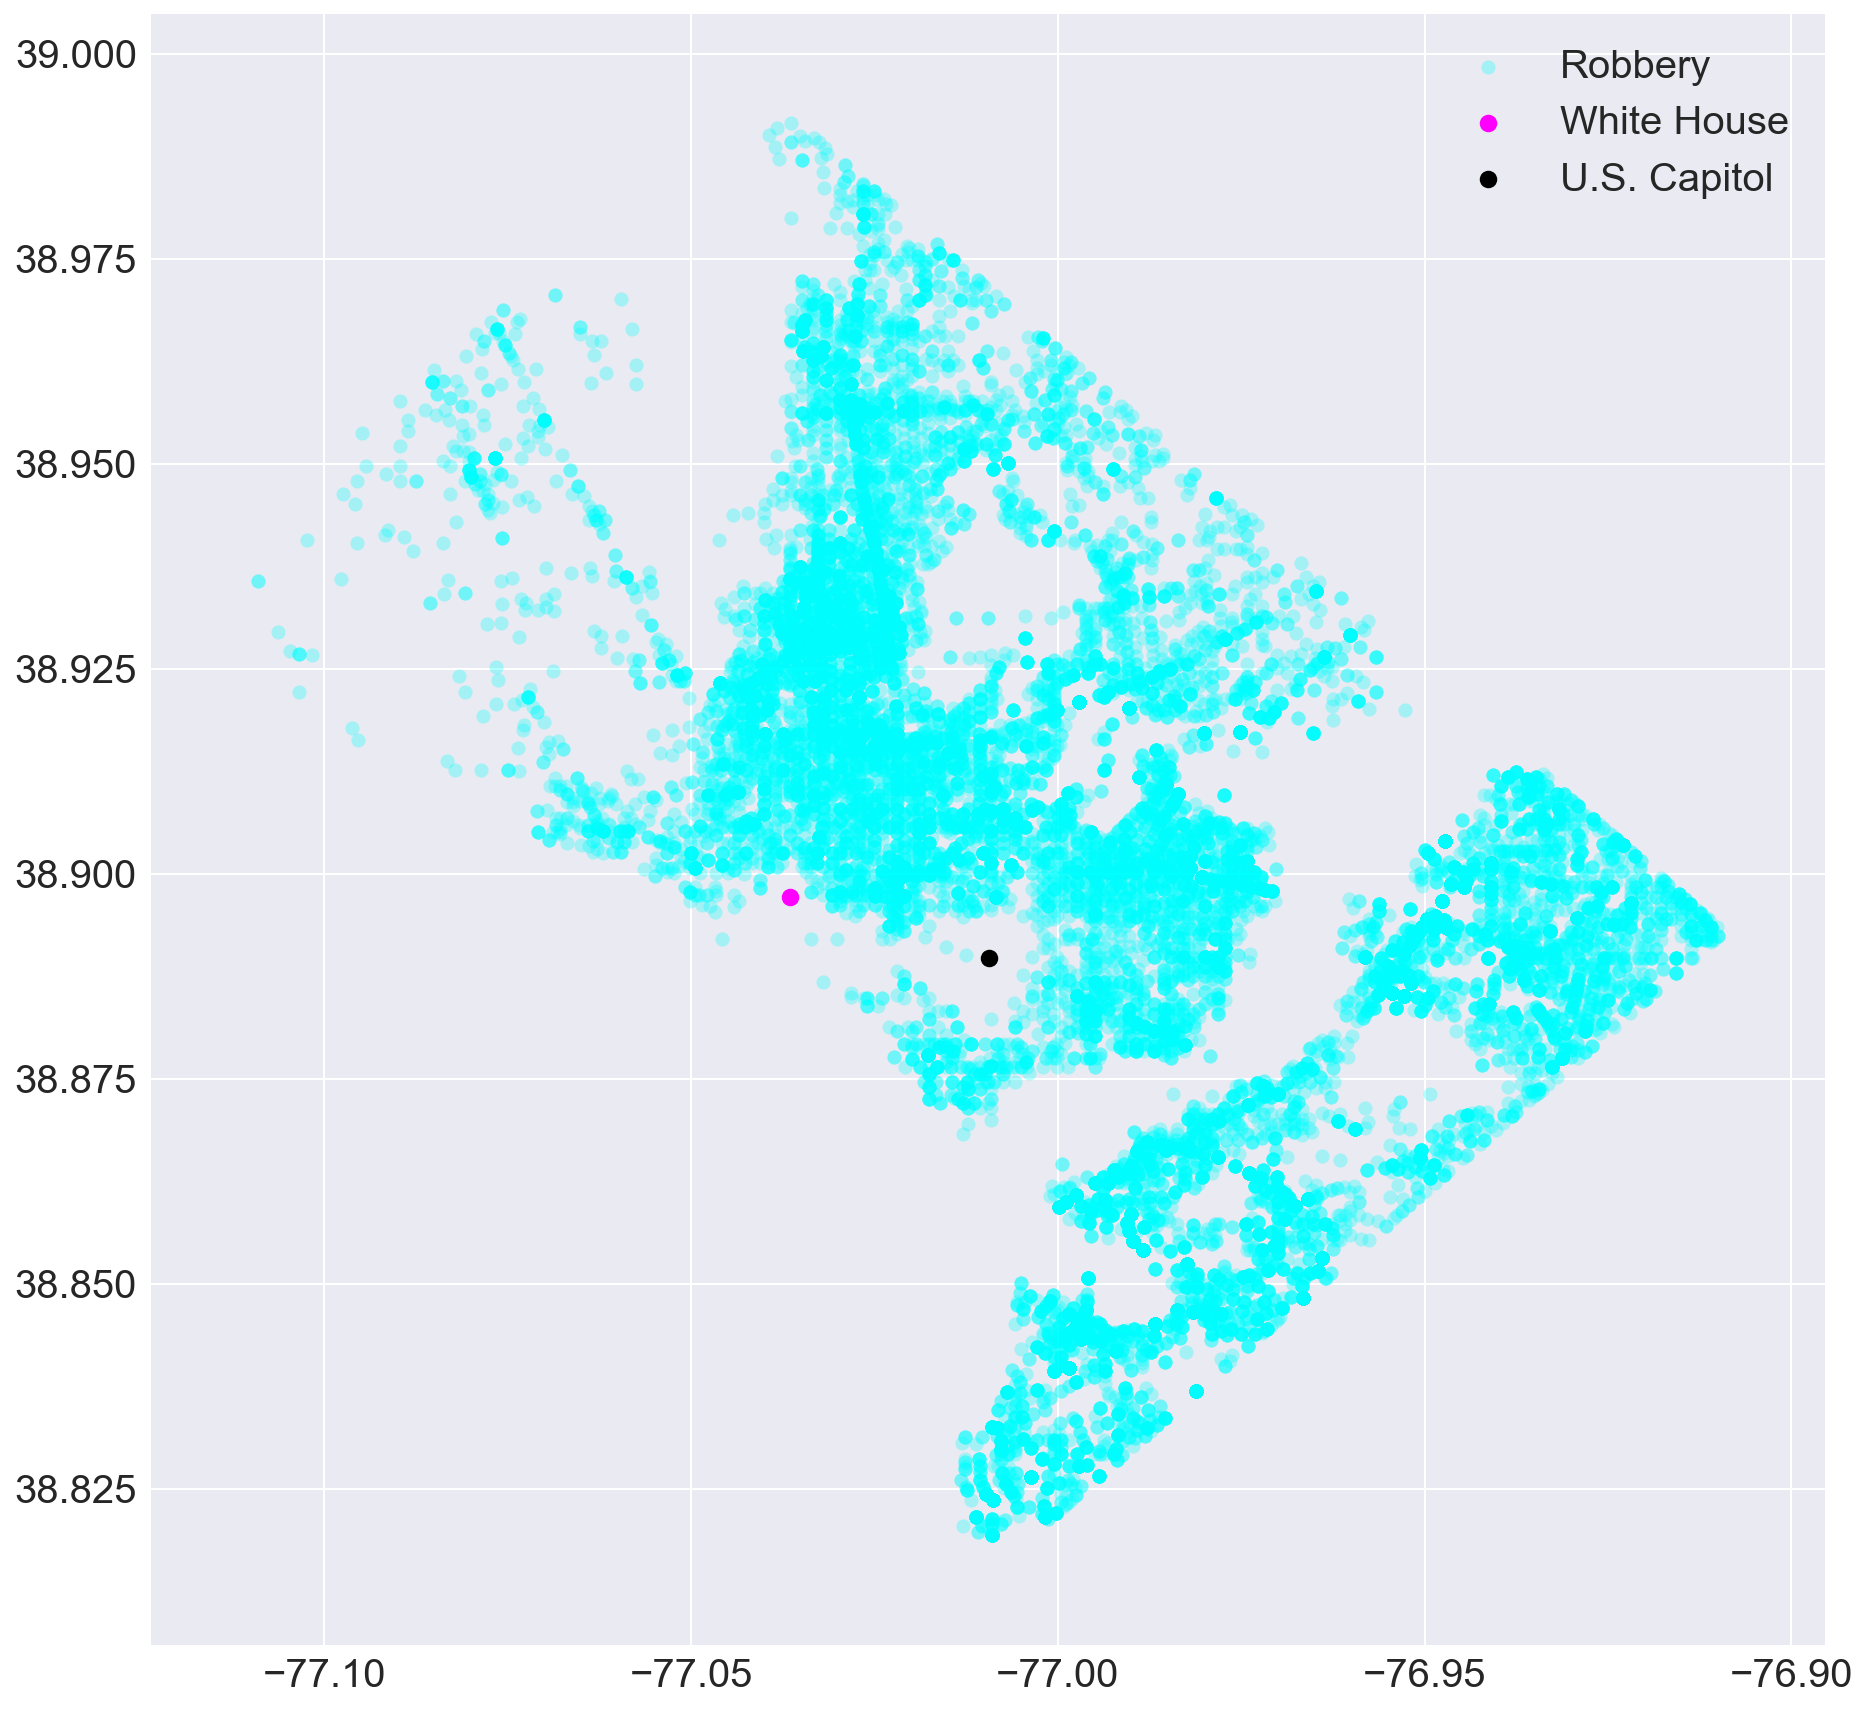

========================== violent crimes[ROBBERY] in Washington DC ===========================================


In [24]:
print("========================== Plot of violent[ROBBERY]crimes====================================================")
plt.figure(figsize=(15, 15))
sns.set(font_scale=2)
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='ROBBERY'], df['LATITUDE'][df['OFFENSE']=='ROBBERY'], s=50, alpha=0.3, color=[0.0,1.0,1.0], lw=0, label='Robbery')
plt.scatter(-77.03654,38.89722,s=60, color=[1,0,1], lw=1, label='White House')
plt.scatter(-77.00937,38.88968,s=60, color=[0,0,0], lw=1, label='U.S. Capitol')
plt.legend(loc='upper right')
plt.show()
print("========================== violent crimes[ROBBERY] in Washington DC ===========================================")

========================== Plot of violent crimes=============================================================


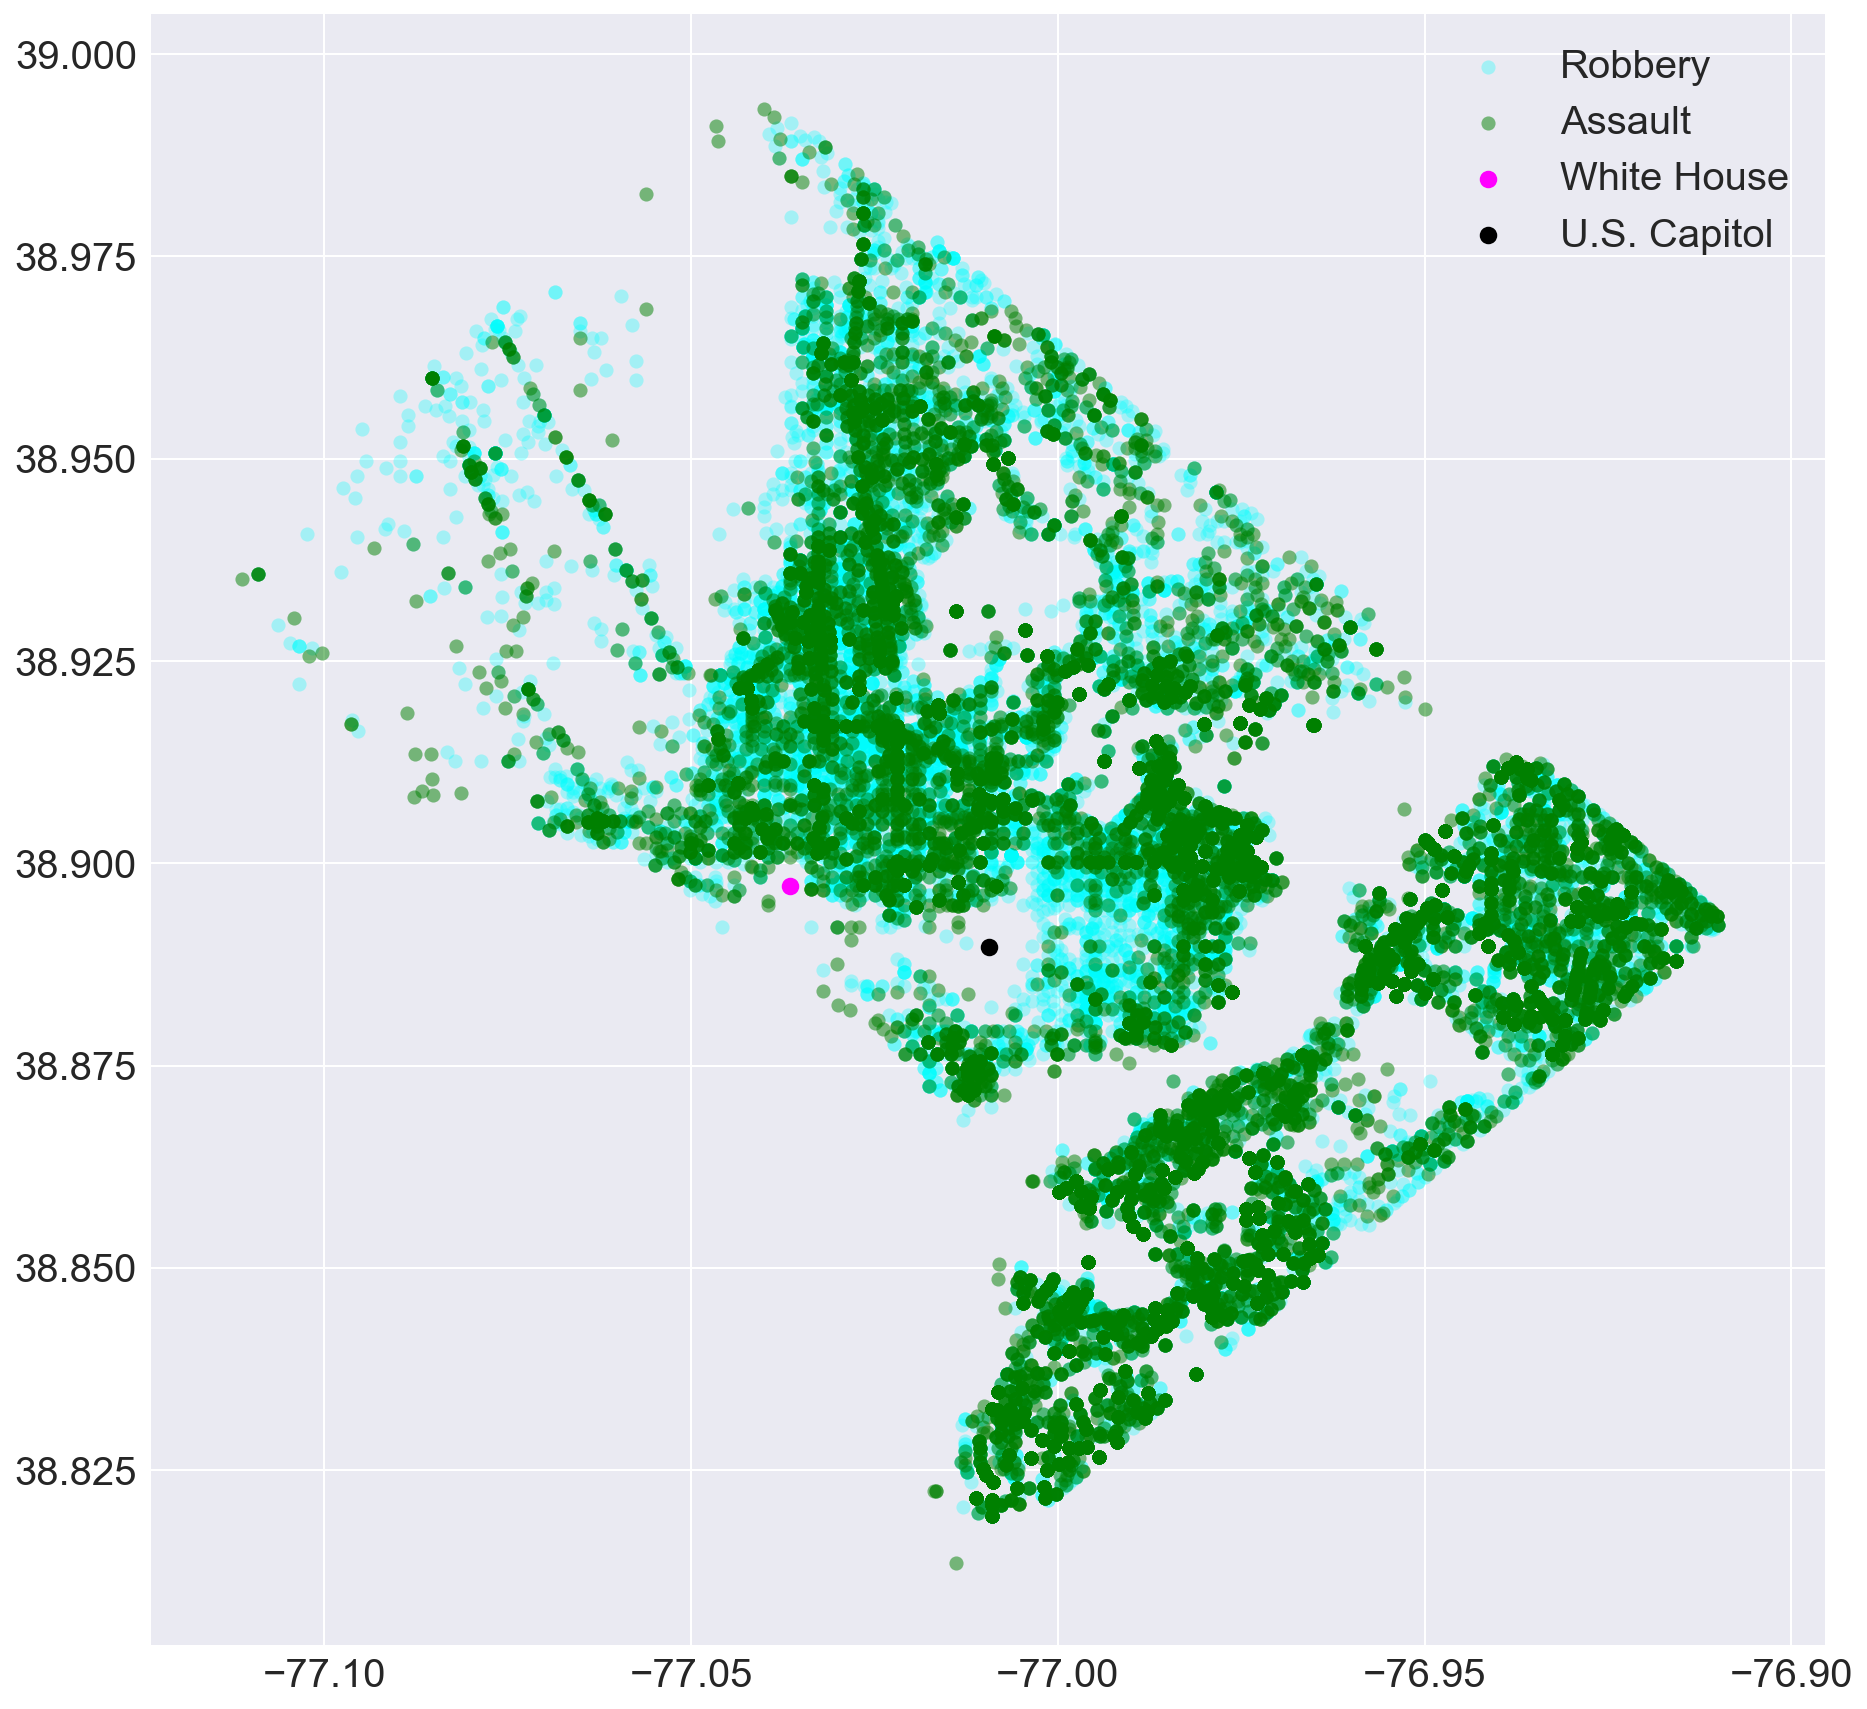

========================== violent crimes in Washington DC ====================================================


In [25]:
print("========================== Plot of violent crimes=============================================================")
plt.figure(figsize=(15, 15))
sns.set(font_scale=2)
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='ROBBERY'], df['LATITUDE'][df['OFFENSE']=='ROBBERY'], s=50, alpha=0.3, color=[0.0,1.0,1.0], lw=0, label='Robbery')
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='ASSAULT W/DW'], df['LATITUDE'][df['OFFENSE']=='ASSAULT W/DW'], s=50, alpha=0.5, color='g', lw=0, label='Assault')
plt.scatter(-77.03654,38.89722,s=60, color=[1,0,1], lw=1, label='White House')
plt.scatter(-77.00937,38.88968,s=60, color=[0,0,0], lw=1, label='U.S. Capitol')
plt.legend(loc='upper right')
plt.show()
print("========================== violent crimes in Washington DC ====================================================")

========================== Plot of violent[ASSAULT W/DW] crimes======================================================


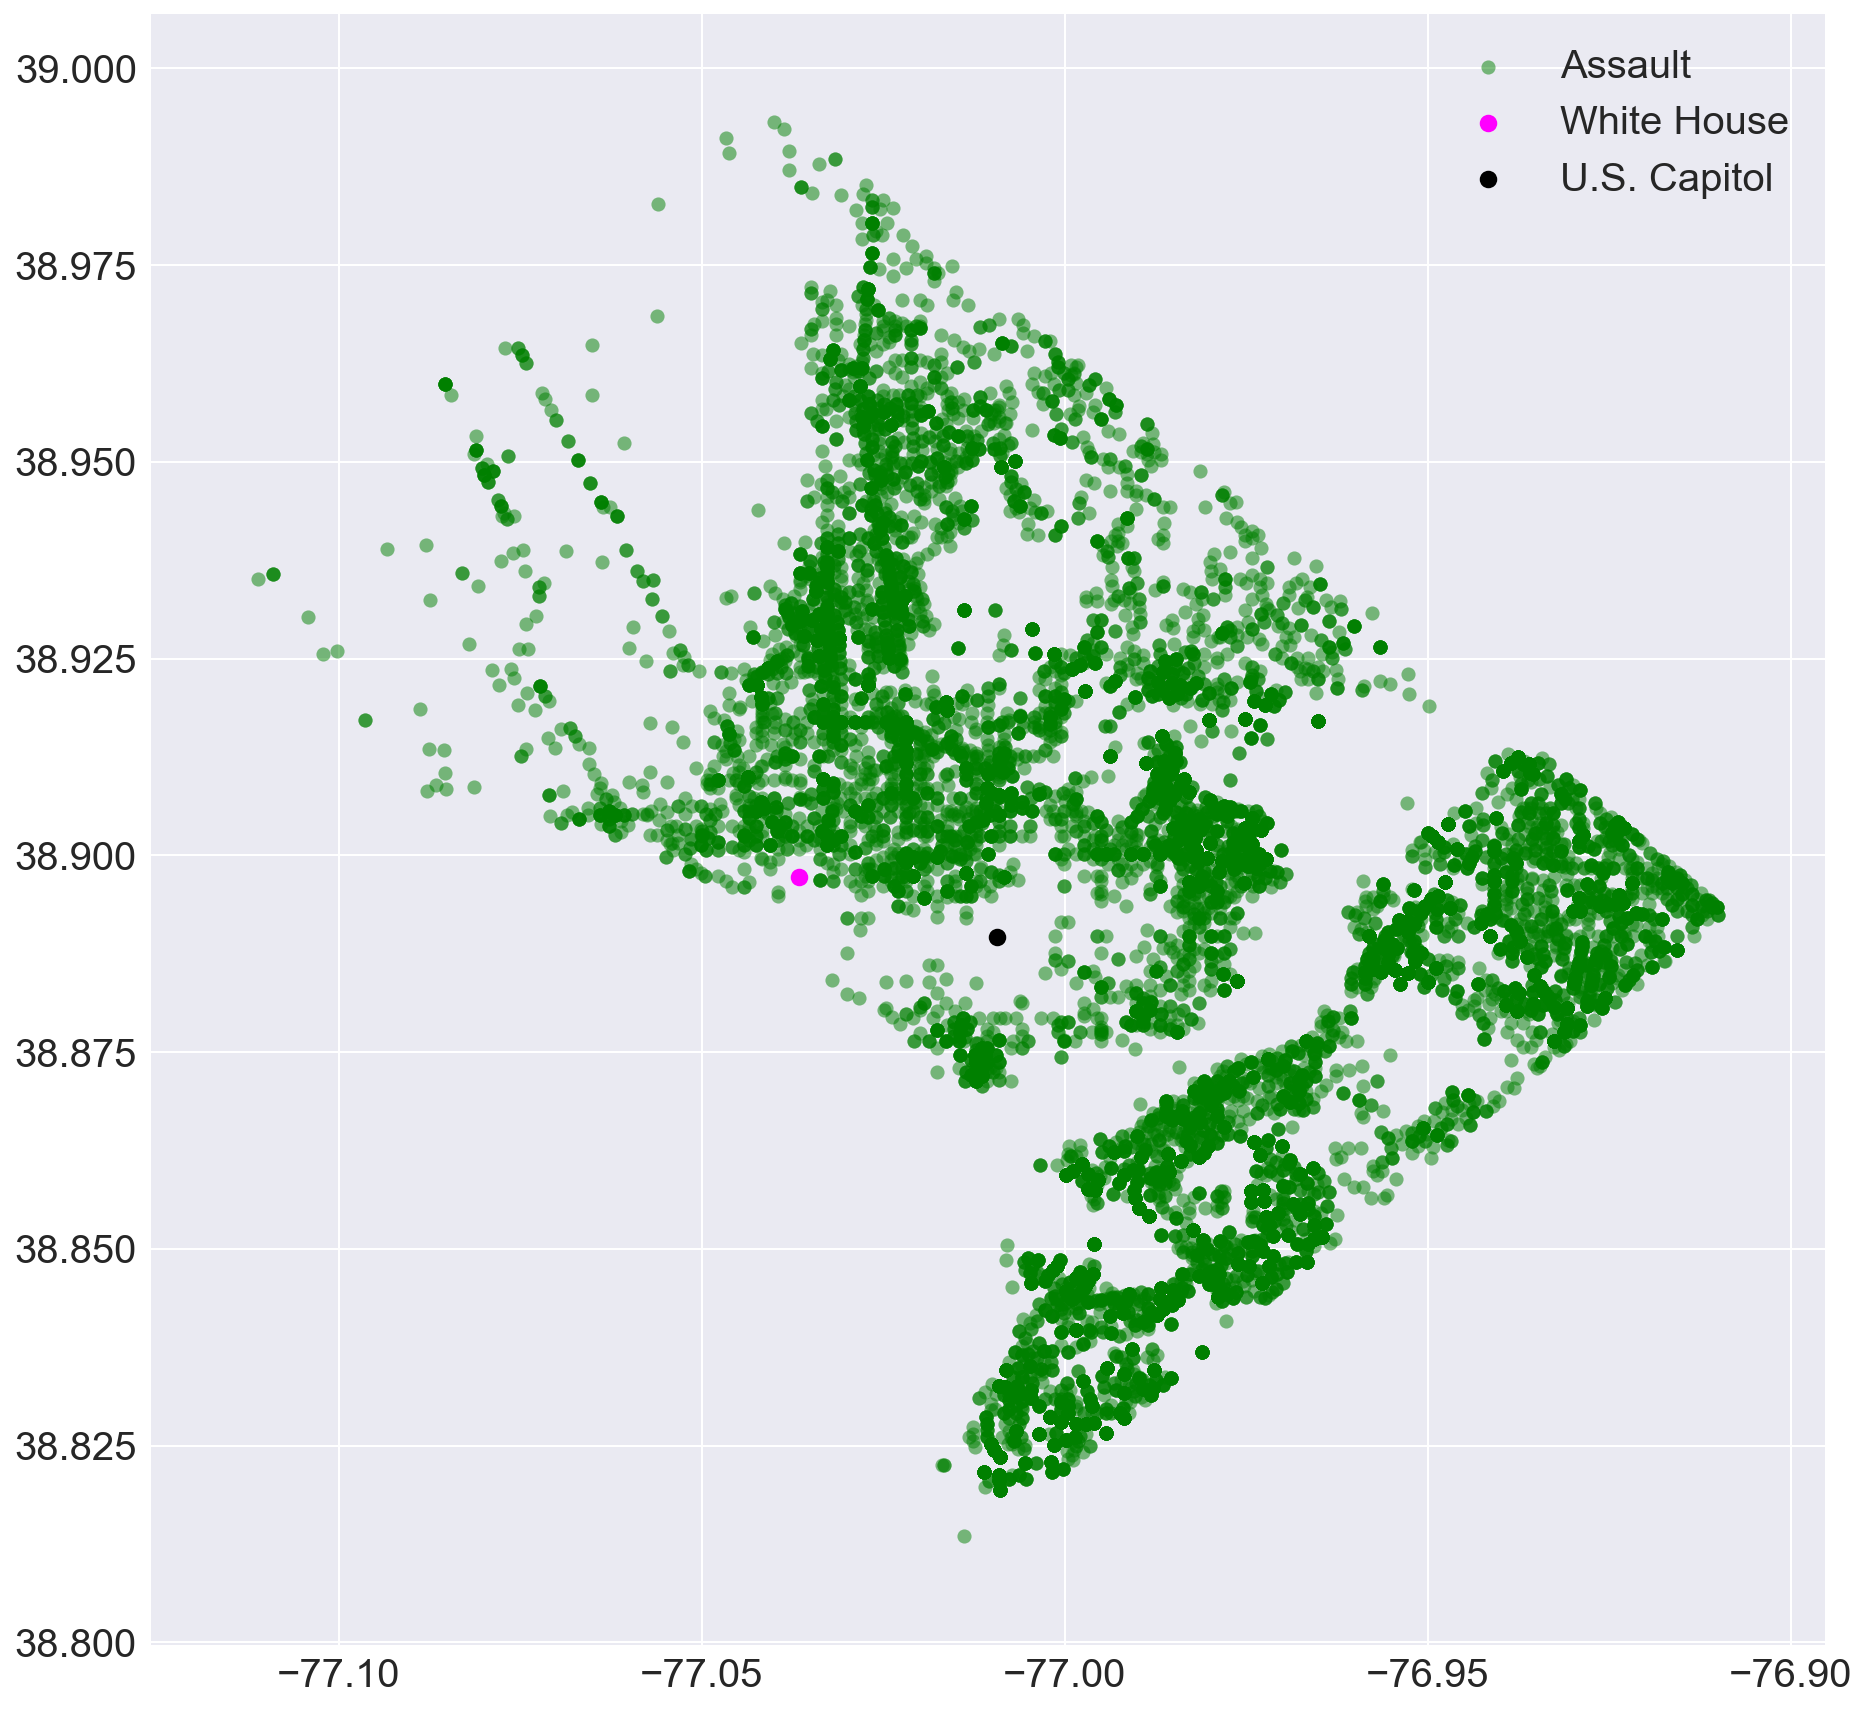

========================== violent crimes[ASSAULT W/DW] in Washington DC ===========================================


In [26]:
print("========================== Plot of violent[ASSAULT W/DW] crimes======================================================")
plt.figure(figsize=(15, 15))
sns.set(font_scale=2)

plt.scatter(df['LONGITUDE'][df['OFFENSE']=='ASSAULT W/DW'], df['LATITUDE'][df['OFFENSE']=='ASSAULT W/DW'], s=50, alpha=0.5, color='g', lw=0, label='Assault')
plt.scatter(-77.03654,38.89722,s=60, color=[1,0,1], lw=1, label='White House')
plt.scatter(-77.00937,38.88968,s=60, color=[0,0,0], lw=1, label='U.S. Capitol')
plt.legend(loc='upper right')
plt.show()
print("========================== violent crimes[ASSAULT W/DW] in Washington DC ===========================================")

========================== Plot of violent[SEX ABUSE and HOMICIDE] crimes====================================


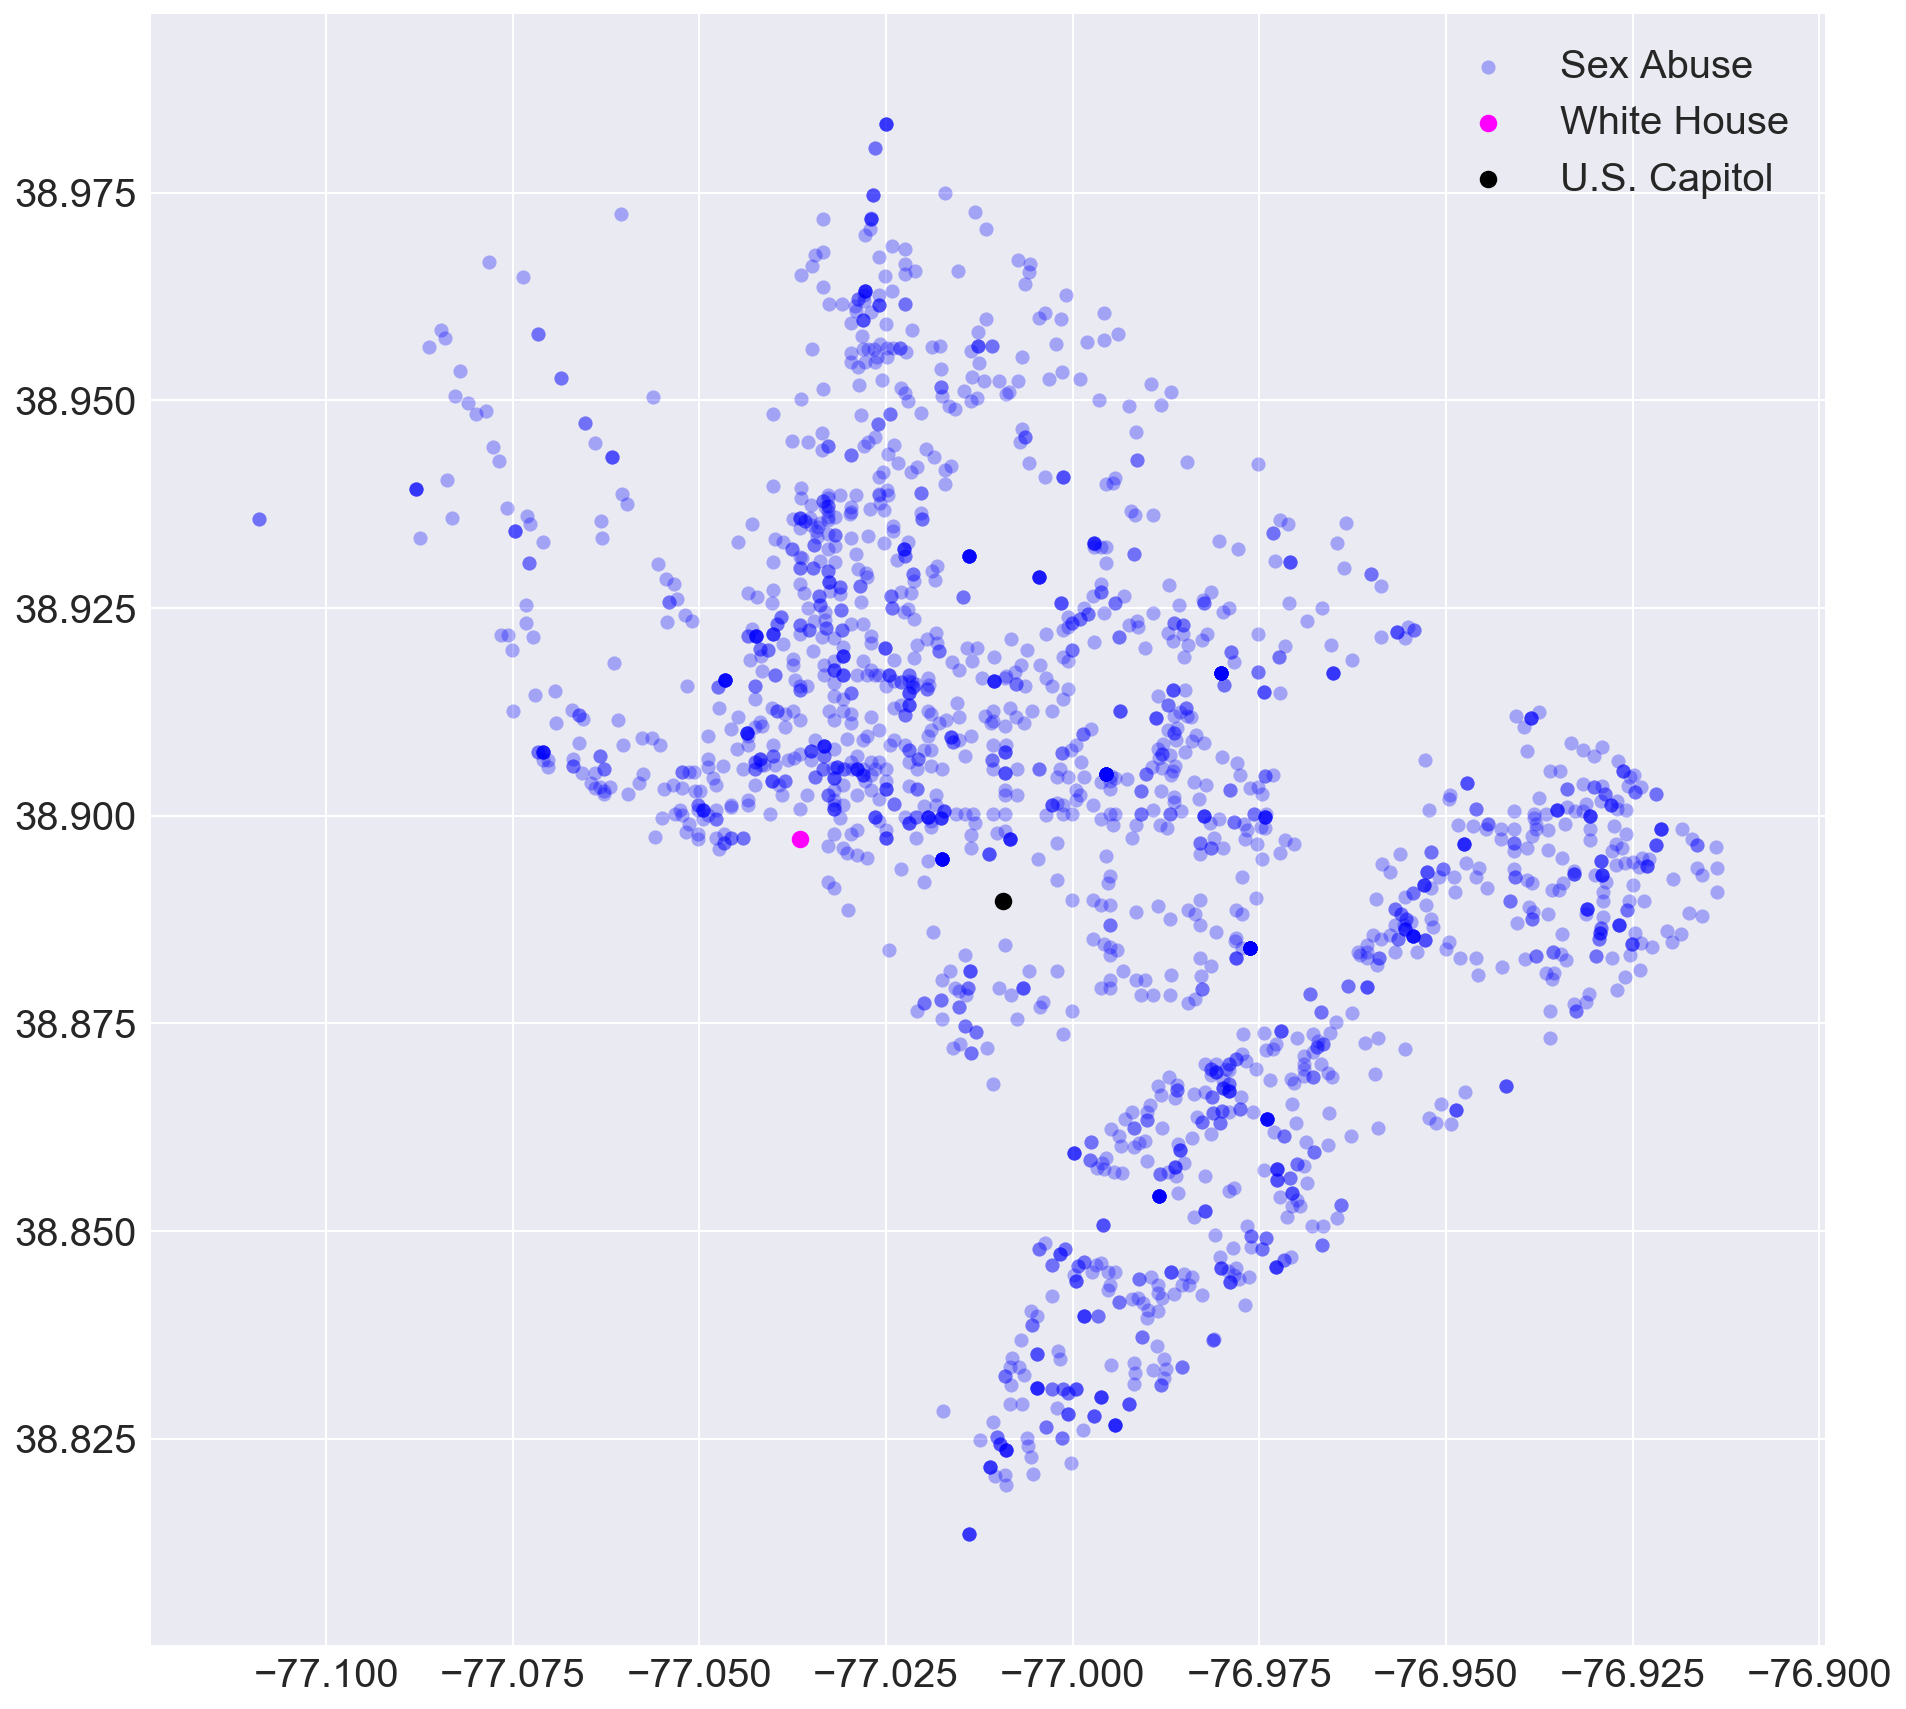

========================== Plot of violent[SEX ABUSE and HOMICIDE] crimes ====================================


In [27]:
print("========================== Plot of violent[SEX ABUSE and HOMICIDE] crimes====================================")
plt.figure(figsize=(15, 15))
sns.set(font_scale=2)
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='SEX ABUSE'], df['LATITUDE'][df['OFFENSE']=='SEX ABUSE'], s=50, alpha=0.3, color='b', lw=0, label='Sex Abuse')
plt.scatter(-77.03654,38.89722,s=60, color=[1,0,1], lw=1, label='White House')
plt.scatter(-77.00937,38.88968,s=60, color=[0,0,0], lw=1, label='U.S. Capitol')
plt.legend(loc='upper right')
plt.show()
print("========================== Plot of violent[SEX ABUSE and HOMICIDE] crimes ====================================")

========================== Plot of violent[SEX ABUSE and HOMICIDE] crimes======================================================


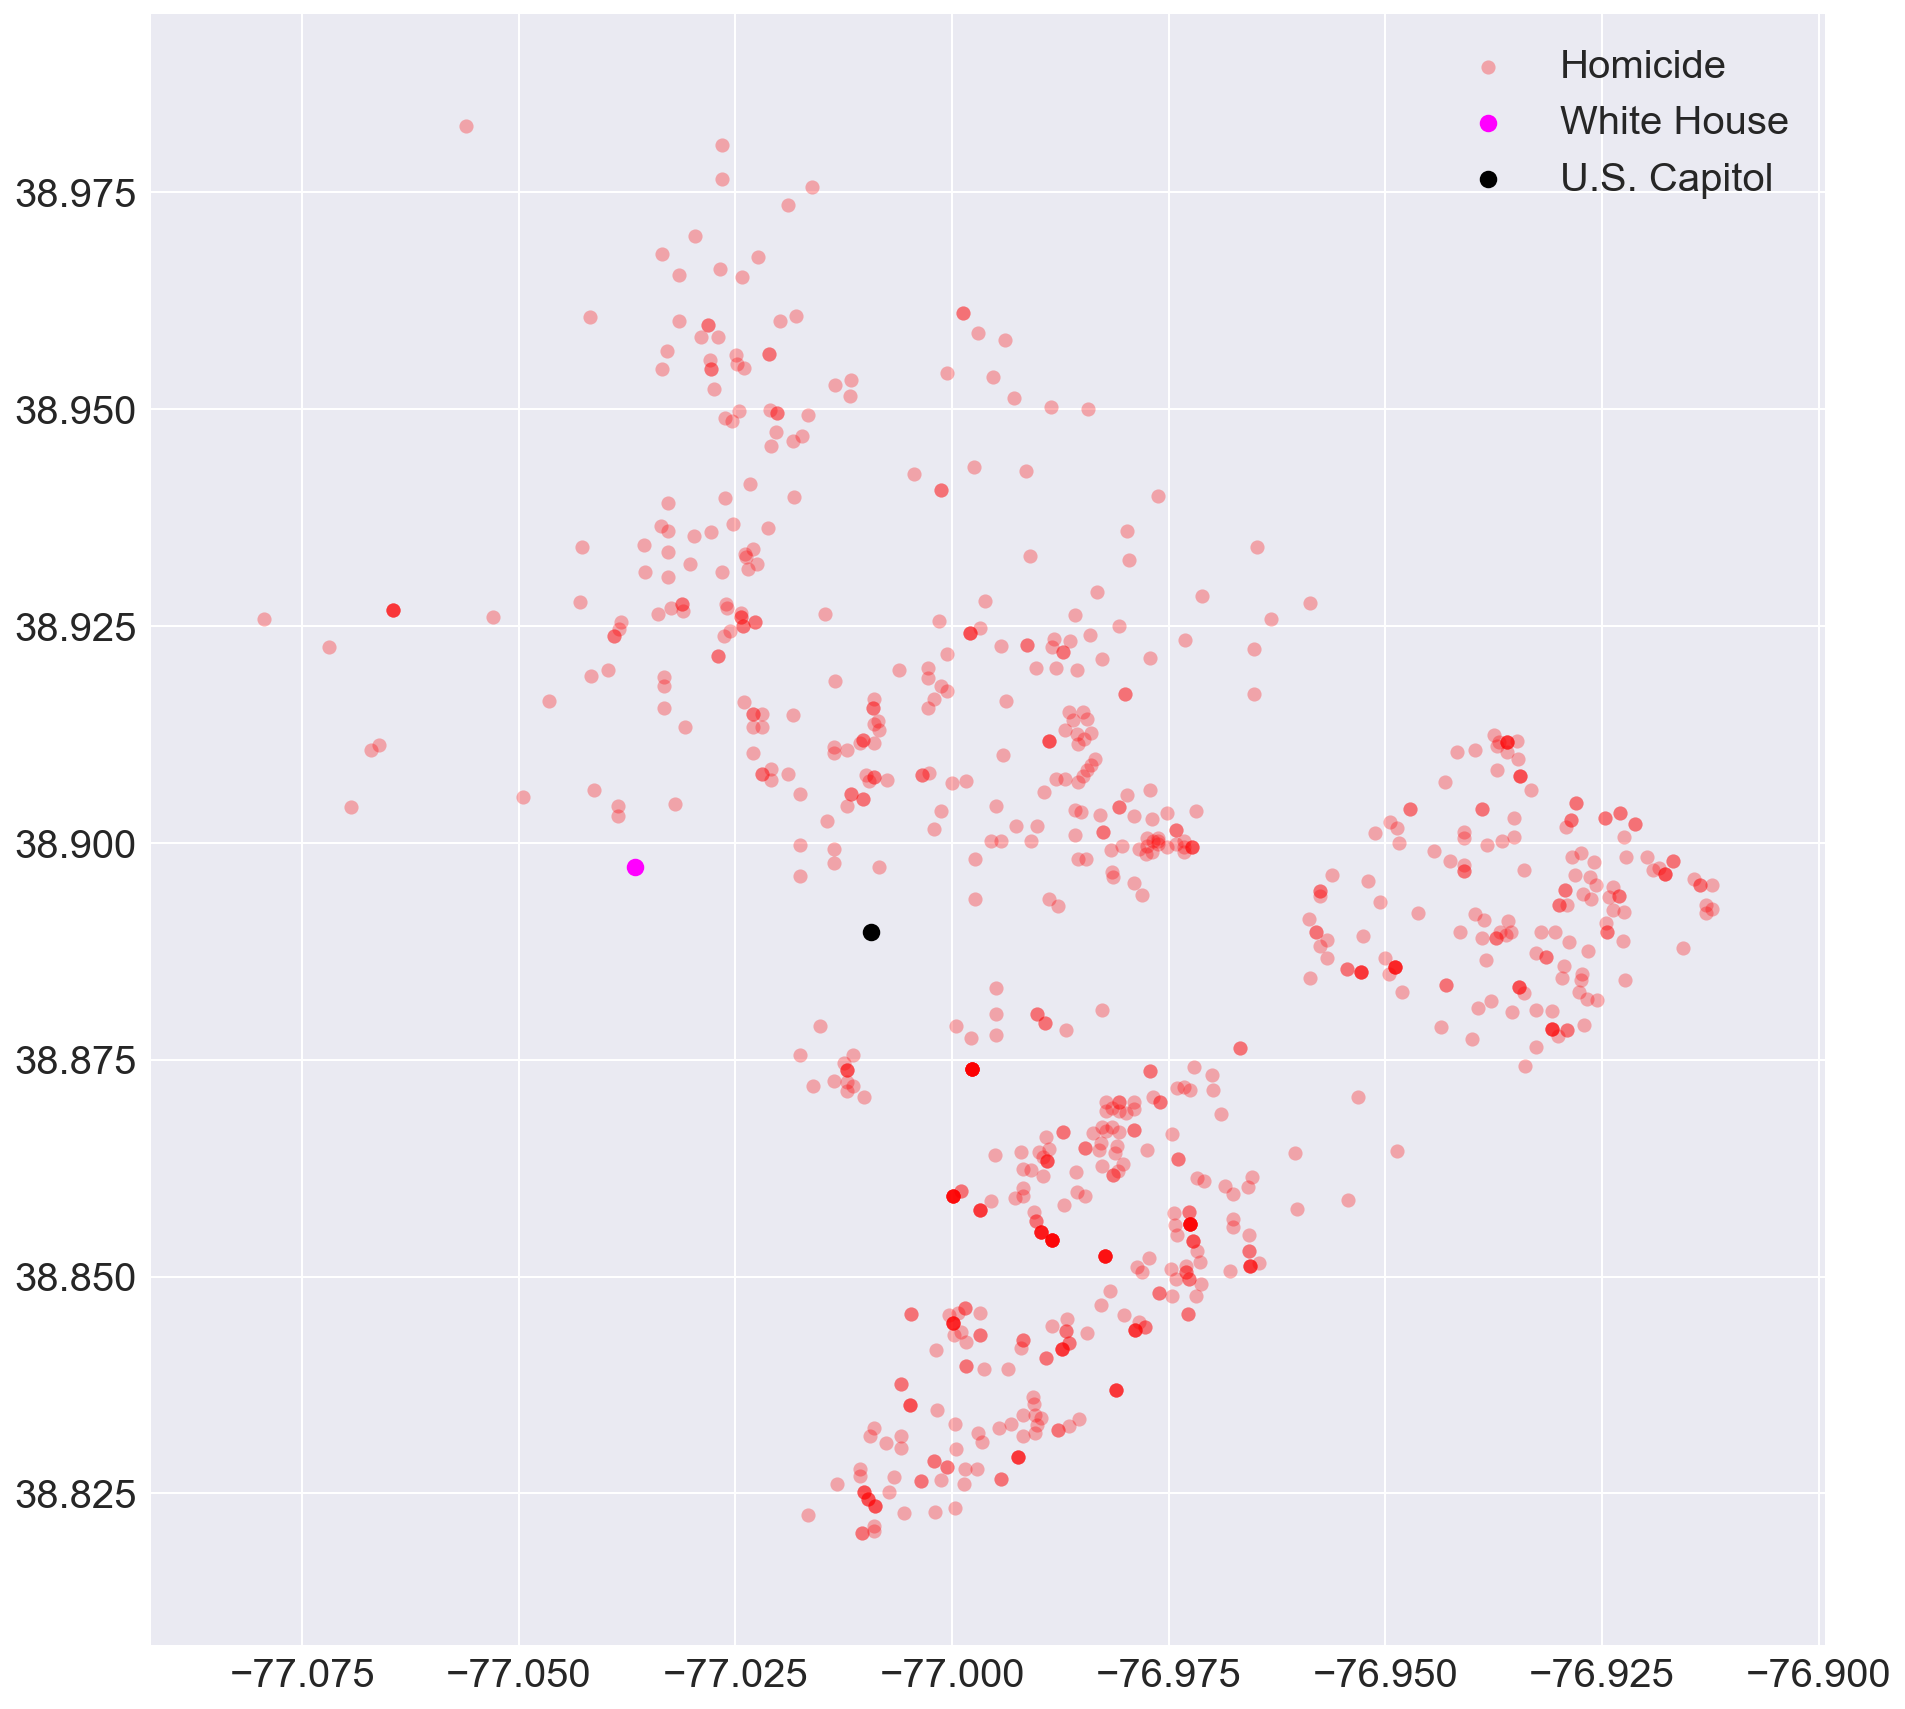

========================== Plot of violent[SEX ABUSE and HOMICIDE] crimes ====================================================


In [28]:
print("========================== Plot of violent[SEX ABUSE and HOMICIDE] crimes======================================================")
plt.figure(figsize=(15, 15))
sns.set(font_scale=2)
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='HOMICIDE'], df['LATITUDE'][df['OFFENSE']=='HOMICIDE'], s=50, alpha=0.3, color='r', lw=0, label='Homicide')
plt.scatter(-77.03654,38.89722,s=60, color=[1,0,1], lw=1, label='White House')
plt.scatter(-77.00937,38.88968,s=60, color=[0,0,0], lw=1, label='U.S. Capitol')
plt.legend(loc='upper right')
plt.show()
print("========================== Plot of violent[SEX ABUSE and HOMICIDE] crimes ====================================================")

========================== Plot of violent[SEX ABUSE and HOMICIDE] crimes====================================


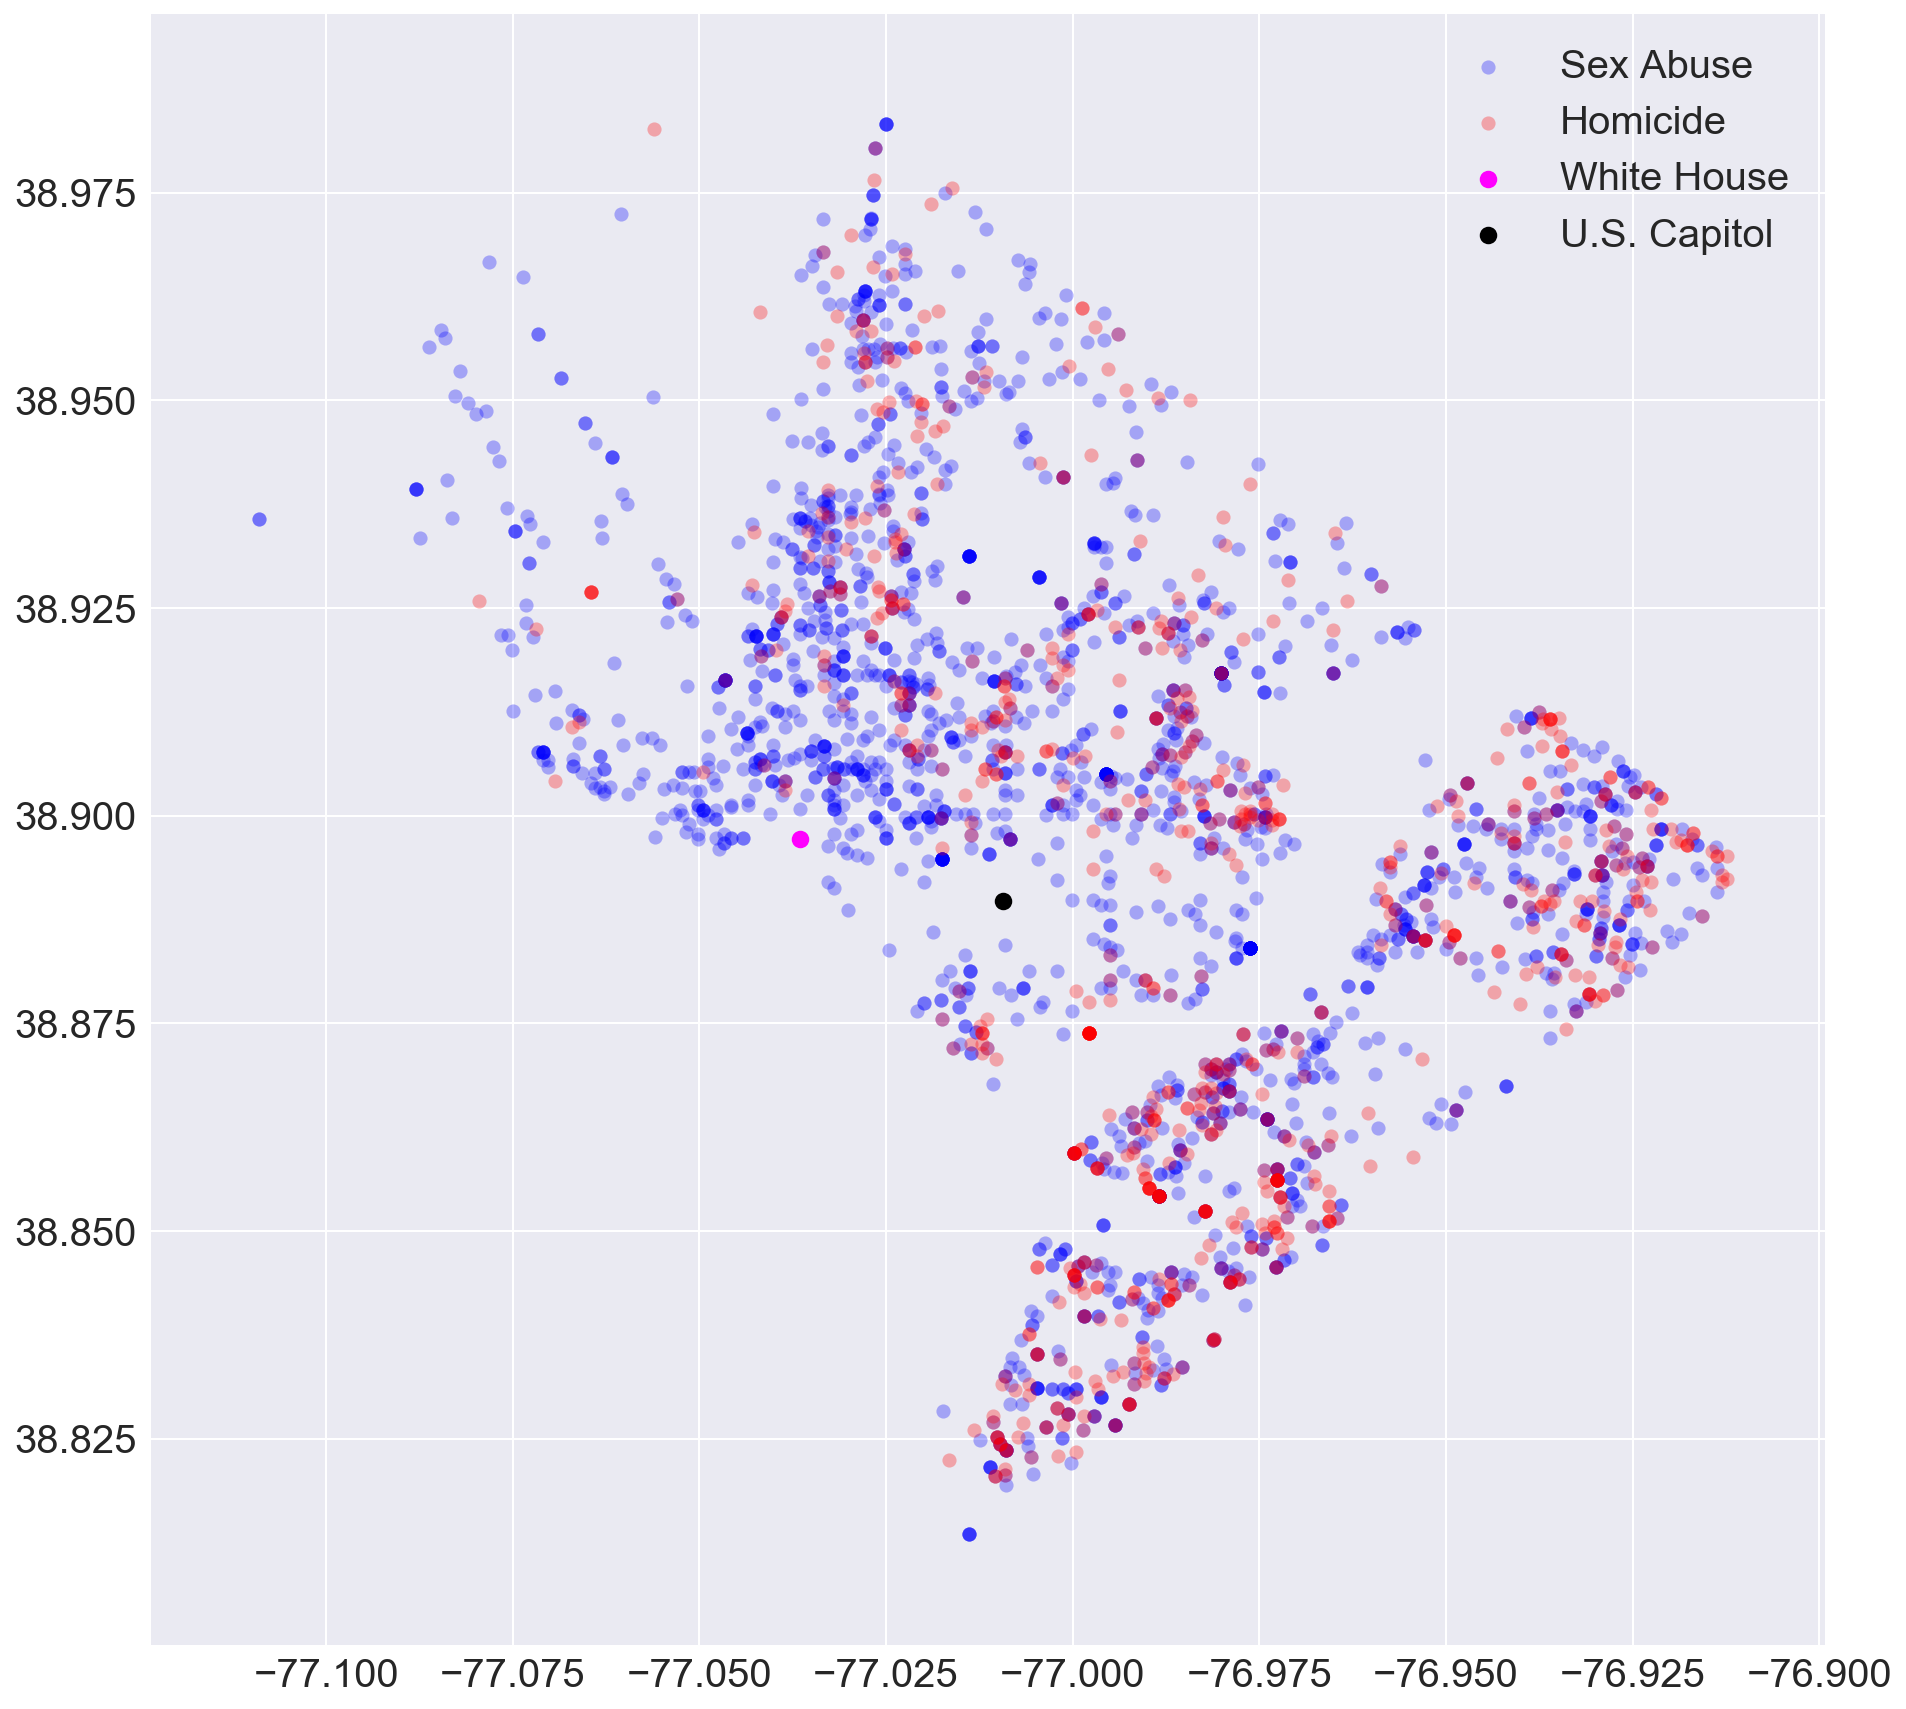

========================== Plot of violent[SEX ABUSE and HOMICIDE] crimes ===================================


In [29]:
print("========================== Plot of violent[SEX ABUSE and HOMICIDE] crimes====================================")
plt.figure(figsize=(15, 15))
sns.set(font_scale=2)
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='SEX ABUSE'], df['LATITUDE'][df['OFFENSE']=='SEX ABUSE'], s=50, alpha=0.3, color='b', lw=0, label='Sex Abuse')
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='HOMICIDE'], df['LATITUDE'][df['OFFENSE']=='HOMICIDE'], s=50, alpha=0.3, color='r', lw=0, label='Homicide')
plt.scatter(-77.03654,38.89722,s=60, color=[1,0,1], lw=1, label='White House')
plt.scatter(-77.00937,38.88968,s=60, color=[0,0,0], lw=1, label='U.S. Capitol')
plt.legend(loc='upper right')
plt.show()
print("========================== Plot of violent[SEX ABUSE and HOMICIDE] crimes ===================================")

In [31]:
def plot_corr(df, size = 11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, vmin=-1, vmax=1)
    fig.colorbar(cax, shrink = .8)
    ax.grid(True)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)

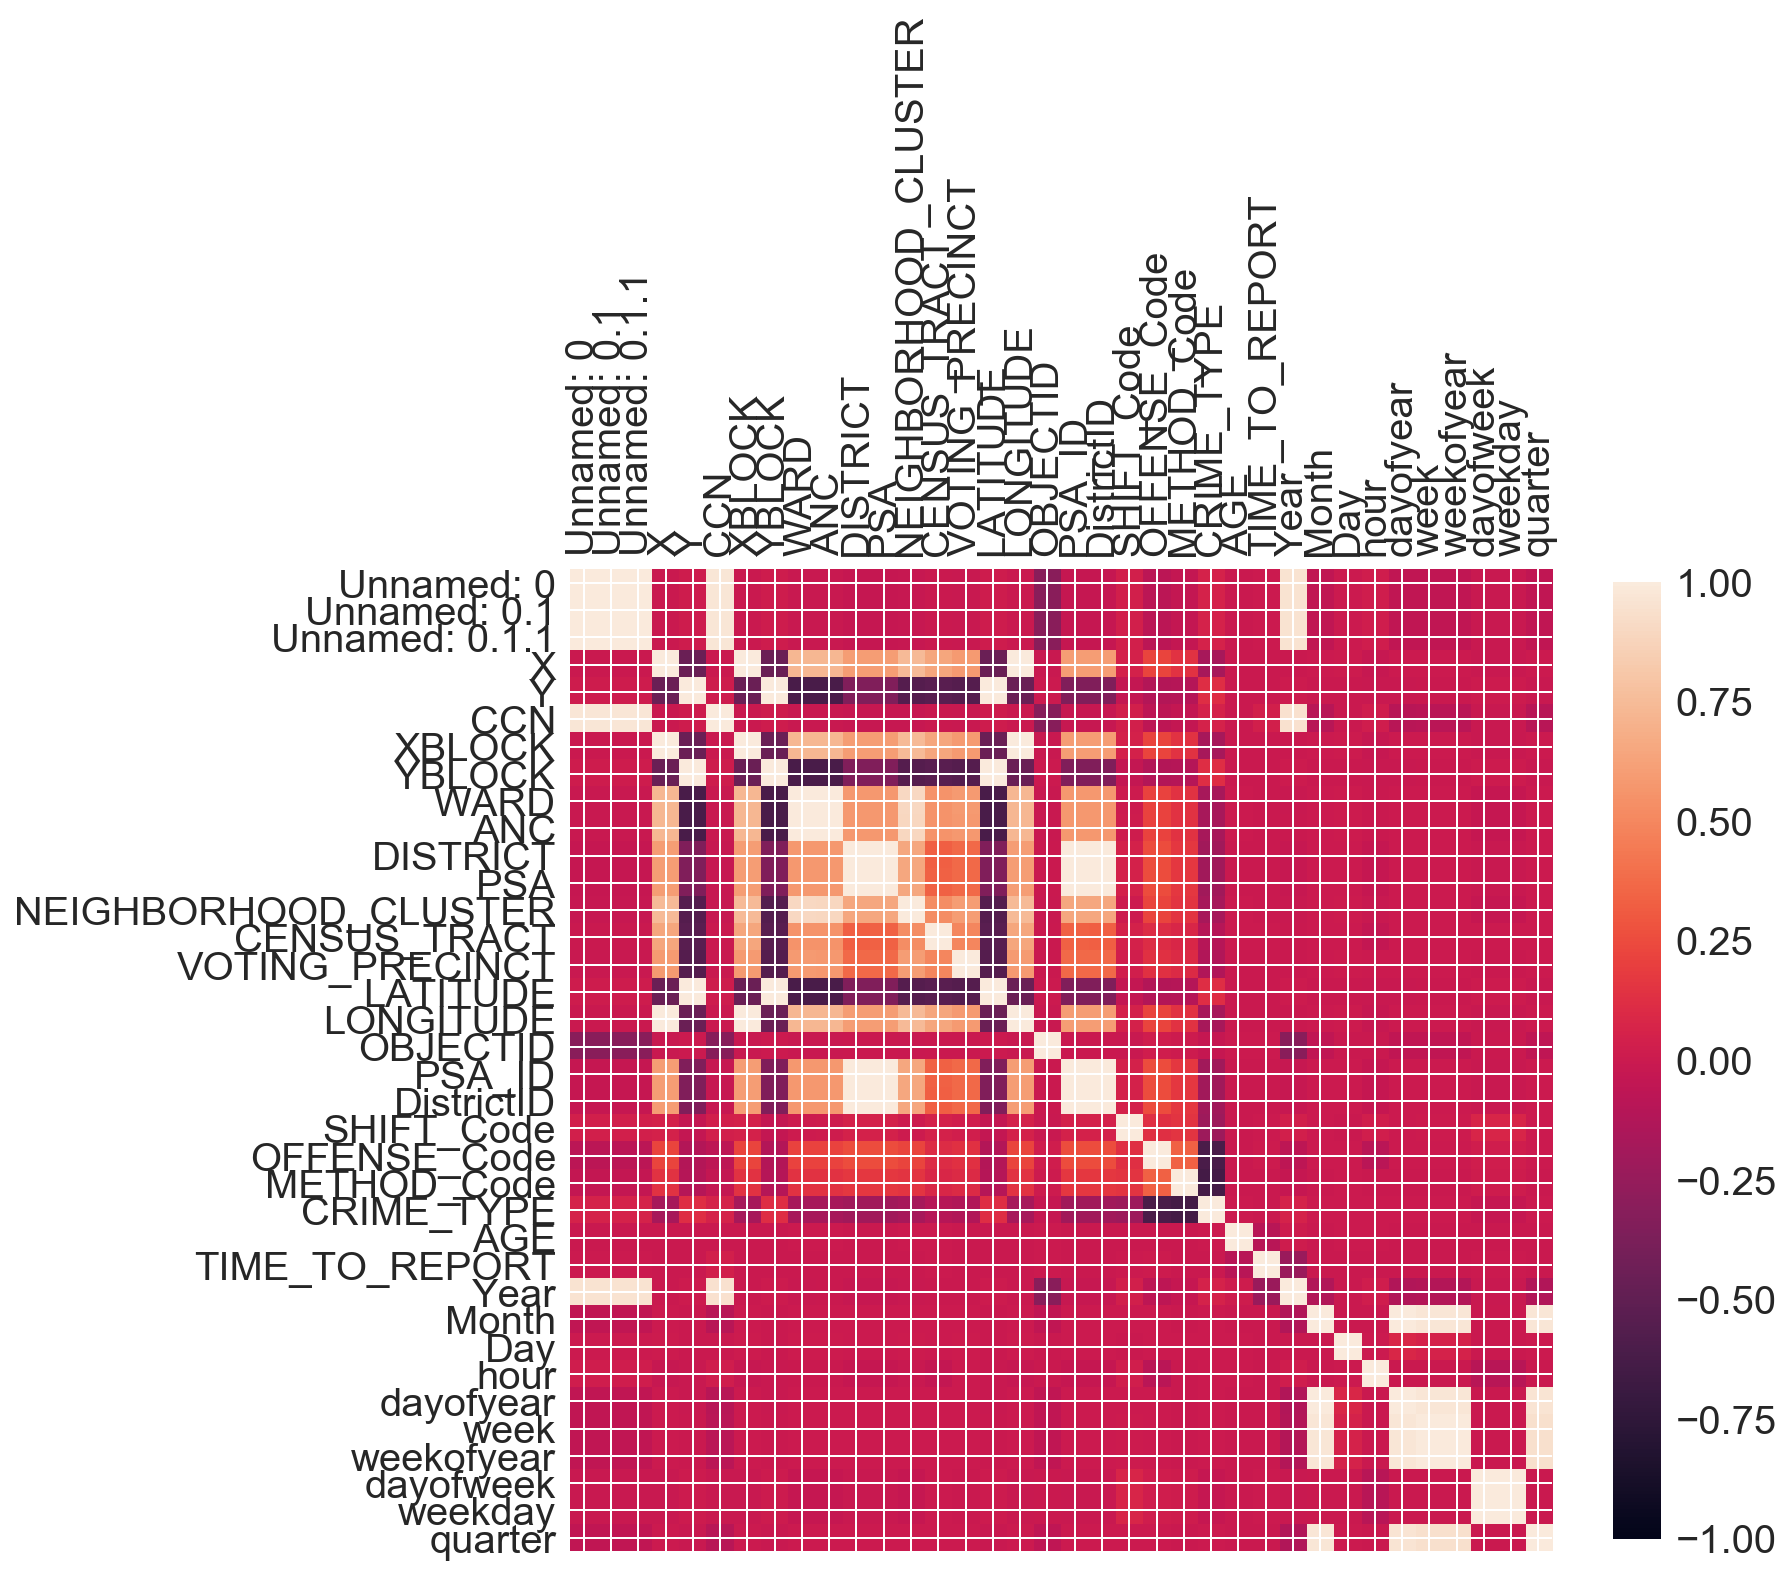

In [32]:
plot_corr(df)
corrMatrix = df.corr()
corrMatrix.to_csv('./input/dc_crime1corr.csv')

In [33]:
# df.drop(df.columns[['Unnamed:0', 'Unnamed:0.1', 'Unnamed:0.1.1']], axis=1, inplace=True)

In [34]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'X', 'Y', 'CCN',
       'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'XBLOCK', 'YBLOCK', 'WARD',
       'ANC', 'DISTRICT', 'PSA', 'NEIGHBORHOOD_CLUSTER', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'PSA_ID', 'DistrictID', 'SHIFT_Code',
       'OFFENSE_Code', 'METHOD_Code', 'CRIME_TYPE', 'AGE', 'TIME_TO_REPORT',
       'DATE', 'Year', 'Month', 'Day', 'hour', 'dayofyear', 'week',
       'weekofyear', 'dayofweek', 'weekday', 'quarter'],
      dtype='object')

In [35]:
df.to_csv('./input/dc_crime3.csv')